In [96]:
#Importing imp libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [97]:
#Reading dataset
df = pd.read_csv(r'D:\VS code files\building_energy_consumption\dataset\singapore_dataset\end_end\data\building-energy-performance-data-for-2022.csv')
df.head()

,Building Type,Main Function,Building Size,2020 EUI,2020 EUI Quartile/ Energy Ranking,2021 EUI,2021 EUI Quartile/ Energy Ranking,2022 EUI,2022 EUI Quartile/ Energy Ranking,TOP/CSC Year,Award (Green/Non-Green),Green Mark Version,GFA,AC Area,AC Area Percentage,No. Of Hotel Room,AC Type,Age of Chiller,Air-con system efficiency (kW/RT)
0,Commercial Building,Industrial,Large,3725.0,NaN,4453,NaN,4580,NaN,2015,Platinum,Existing Data Centres,"35,218","28,536",81%,0,Water Cooled Chilled Water Plant,7.0,0.744
1,Commercial Building,Industrial,Large,2044.0,Bottom Quartile,2214,Bottom Quartile,2305,Bottom Quartile,1999,NaN,NaN,"38,349","20,000",52%,0,Water Cooled Chilled Water Plant,20.0,0.000
2,Commercial Building,Industrial,Large,1157.0,Bottom Quartile,1182,Bottom Quartile,1151,Bottom Quartile,2014,Platinum,New Building for Non-Residential buildings (ve...,"19,173","19,173",100%,0,Water Cooled Chilled Water Plant,5.0,0.578
3,Commercial Building,Office,Large,553.0,Bottom Quartile,661,Bottom Quartile,805,Bottom Quartile,1986,NaN,NaN,"15,819","12,724",80%,0,Water Cooled Chilled Water Plant,0.0,0.000
4,Commercial Building,Industrial,Large,713.0,Bottom Quartile,712,Bottom Quartile,724,Bottom Quartile,1995,GoldPlus,Existing Building for Non-Residential building...,"30,469","22,476",74%,0,Water Cooled Chilled Water Plant,8.0,0.582


In [98]:
df.drop(columns=['AC Area Percentage'],inplace=True,axis=1)

In [99]:
#Data Shape
print("**"*30)
print(f"Shape of the data are as follow {df.shape[0]} rows & {df.shape[1]} Columns")
print("**"*30)

************************************************************
Shape of the data are as follow 1498 rows & 18 Columns
************************************************************


In [100]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
2020 EUI,1498.0,213.638531,211.811931,0.00,111.1075,172.39,256.905,3725.0
2021 EUI,1498.0,129.025367,219.287172,0.00,0.0000,82.00,190.000,4453.0
2022 EUI,1498.0,133.268358,225.331443,0.00,0.0000,86.50,197.000,4580.0
TOP/CSC Year,1498.0,1997.638852,54.206560,0.00,1990.0000,2000.00,2011.750,2024.0
No. Of Hotel Room,1498.0,31.411215,138.443298,0.00,0.0000,0.00,0.000,2561.0
Age of Chiller,1498.0,5.692056,6.744702,0.00,0.0000,4.00,9.000,53.0
Air-con system efficiency (kW/RT),1498.0,17.579817,633.650741,-3.32,0.0000,0.00,0.000,24506.0


In [101]:
df.describe(include='object')

,Building Type,Main Function,Building Size,2020 EUI Quartile/ Energy Ranking,2021 EUI Quartile/ Energy Ranking,2022 EUI Quartile/ Energy Ranking,Award (Green/Non-Green),Green Mark Version,GFA,AC Area,AC Type
count,1498,1498,1078,588,594,597,800,778,1498,1498,934
unique,5,17,4,4,4,4,6,20,1161,834,5
top,Commercial Building,Office,Large,Top Quartile,Top Quartile,2nd Quartile,Platinum,Existing Building for Non-Residential building...,"6,359",0,Water Cooled Chilled Water Plant
freq,1256,707,615,153,169,197,314,293,4,577,488


In [102]:
df.isnull().sum()

Building Type                          0
Main Function                          0
Building Size                        420
2020 EUI                               0
2020 EUI Quartile/ Energy Ranking    910
2021 EUI                               0
2021 EUI Quartile/ Energy Ranking    904
2022 EUI                               0
2022 EUI Quartile/ Energy Ranking    901
TOP/CSC Year                           0
Award (Green/Non-Green)              698
Green Mark Version                   720
GFA                                    0
AC Area                                0
No. Of Hotel Room                      0
AC Type                              564
Age  of Chiller                        0
Air-con system efficiency (kW/RT)      0
dtype: int64

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498 entries, 0 to 1497
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Building Type                      1498 non-null   object 
 1   Main Function                      1498 non-null   object 
 2   Building Size                      1078 non-null   object 
 3   2020 EUI                           1498 non-null   float64
 4   2020 EUI Quartile/ Energy Ranking  588 non-null    object 
 5   2021 EUI                           1498 non-null   int64  
 6   2021 EUI Quartile/ Energy Ranking  594 non-null    object 
 7   2022 EUI                           1498 non-null   int64  
 8   2022 EUI Quartile/ Energy Ranking  597 non-null    object 
 9   TOP/CSC Year                       1498 non-null   int64  
 10  Award (Green/Non-Green)            800 non-null    object 
 11  Green Mark Version                 778 non-null    objec

In [104]:
columns_to_remove_comma = ['GFA','AC Area']

for col in columns_to_remove_comma:
    df[col] = df[col].astype(str).str.replace(",", "").astype(float)

In [105]:
df['GFA'] = df['GFA'].astype(float)

In [106]:
#Make two empty list for numeric and object data
#save numeric data into num empty list
num= []
cat = []

#iterate through dataset and save different dtypes in different list
for col in df.columns:

    #take help of api to save numeric data into an empty list
    if pd.api.types.is_numeric_dtype(df[col]):
        num.append(col)
    else:
        cat.append(col)

#Print empty list
print(num)
print(cat)

['2020 EUI', '2021 EUI', '2022 EUI', 'TOP/CSC Year', 'GFA', 'AC Area', 'No. Of Hotel Room', 'Age  of Chiller', 'Air-con system efficiency (kW/RT)']
['Building Type', 'Main Function', 'Building Size', '2020 EUI Quartile/ Energy Ranking', '2021 EUI Quartile/ Energy Ranking', '2022 EUI Quartile/ Energy Ranking', 'Award (Green/Non-Green)', 'Green Mark Version', 'AC Type']


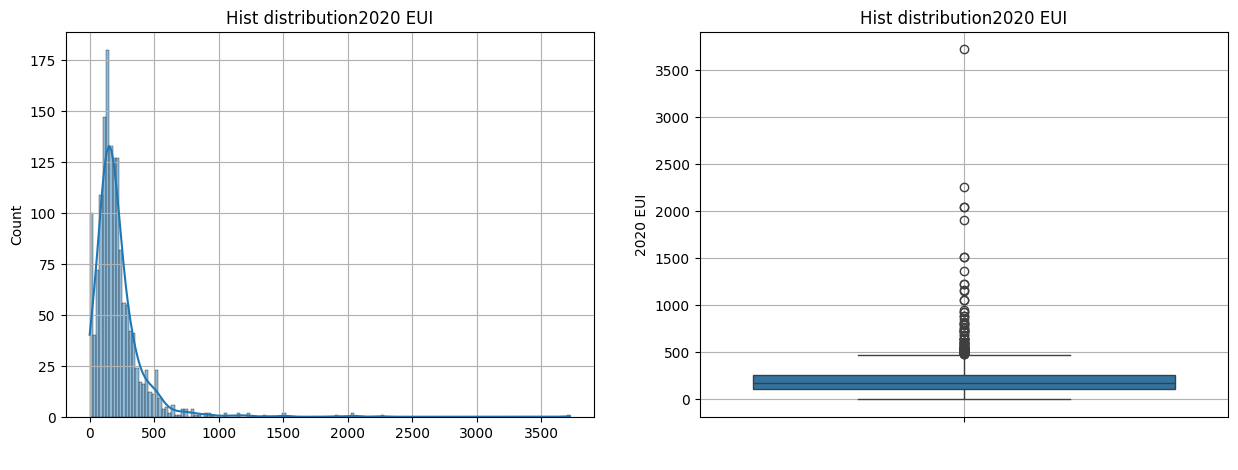

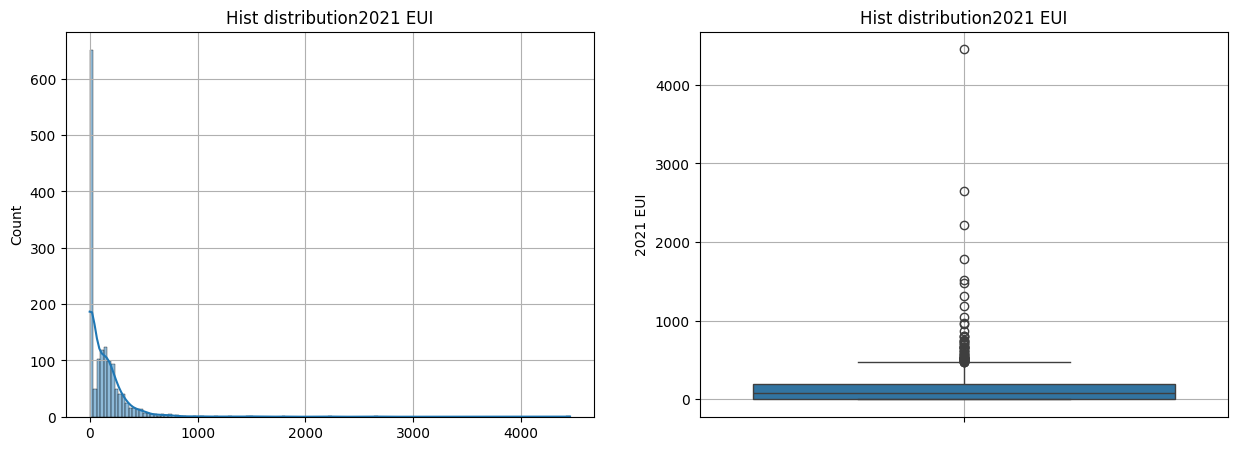

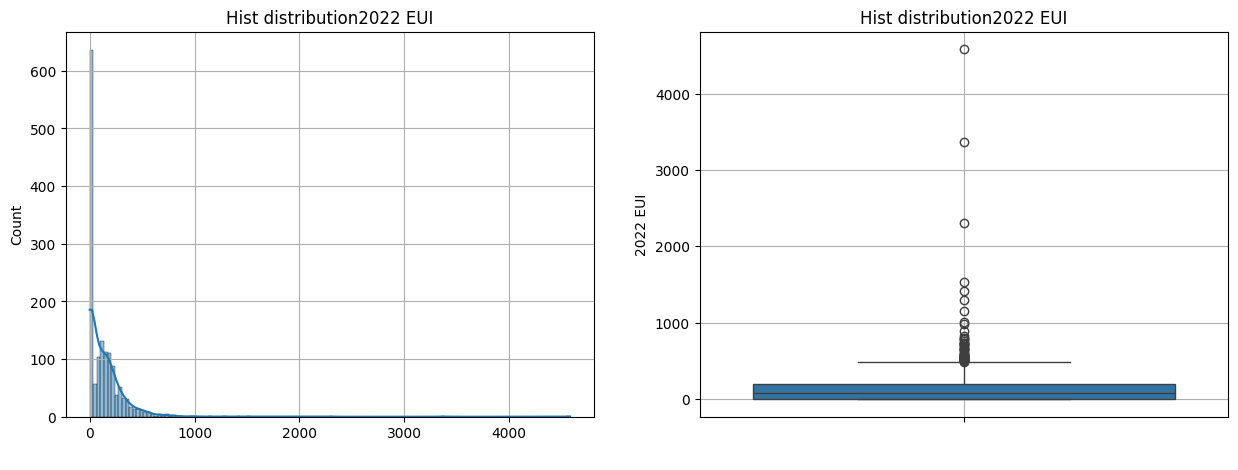

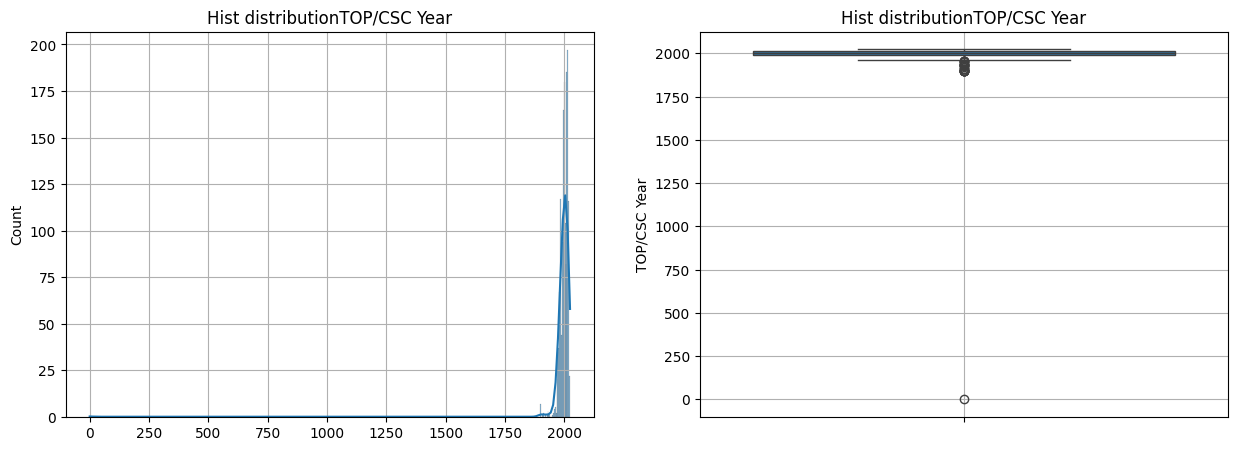

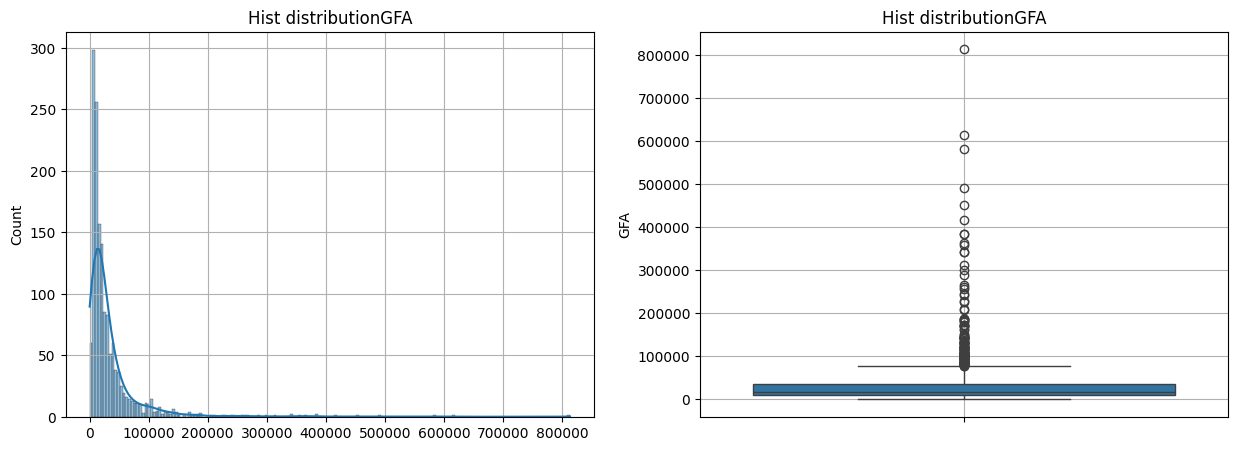

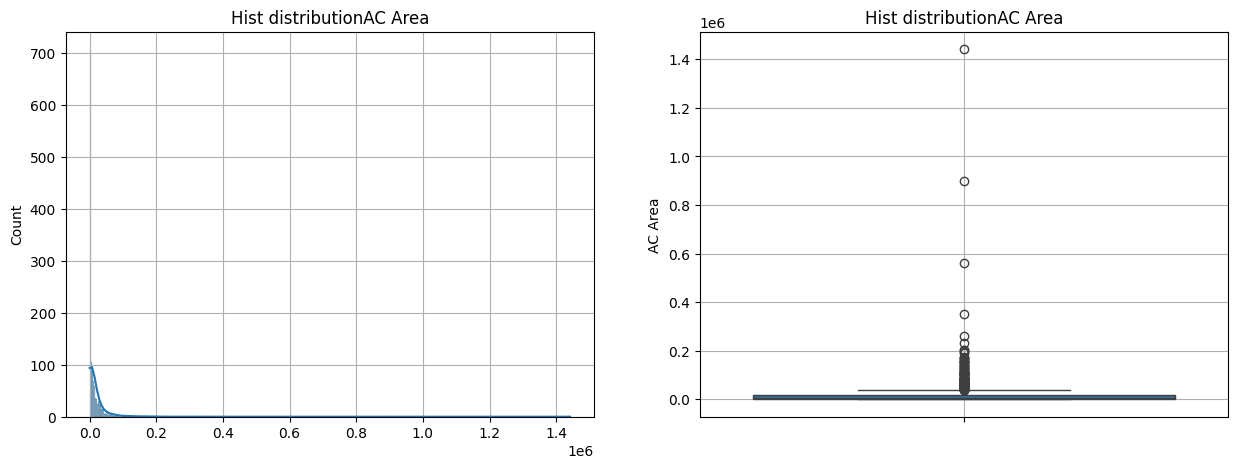

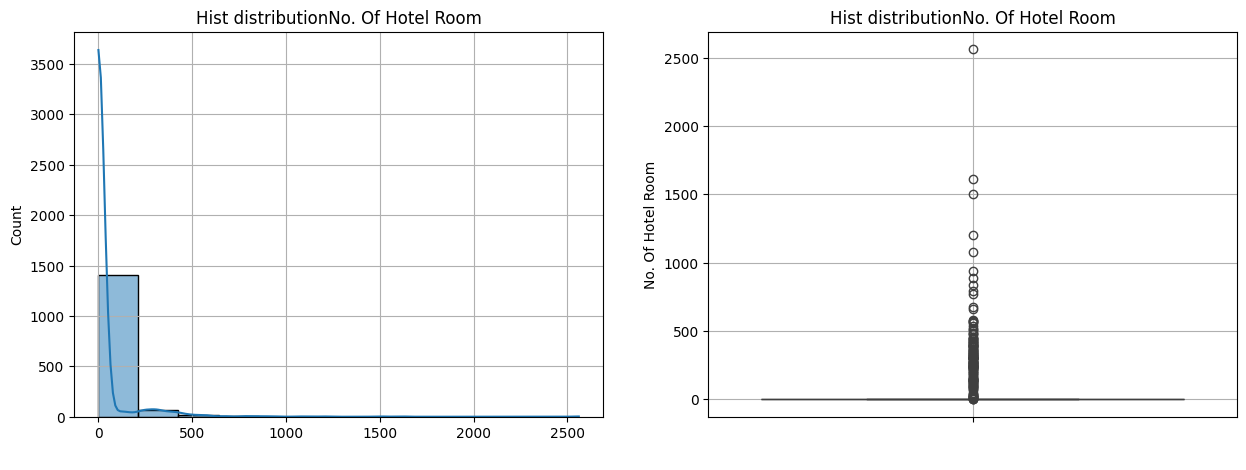

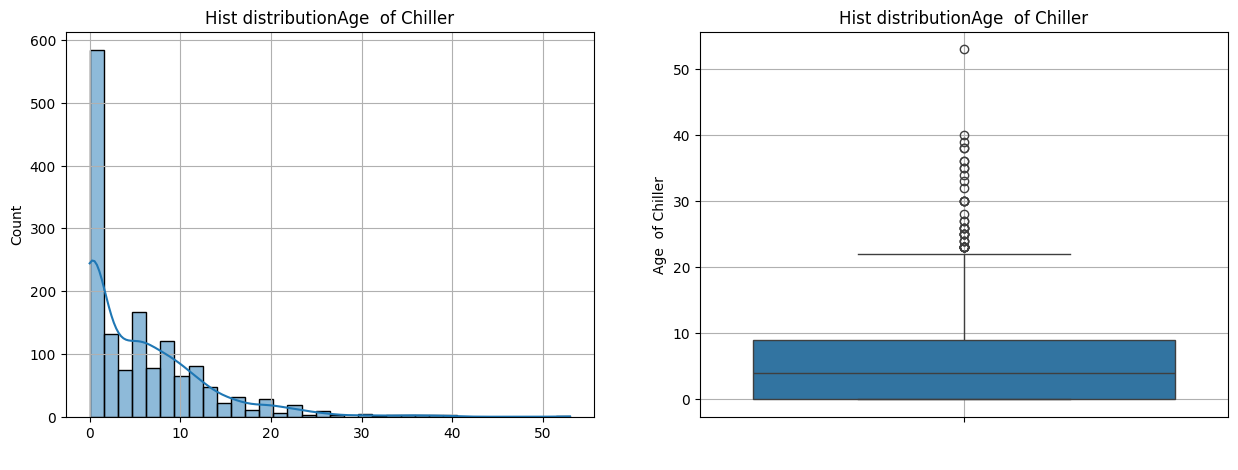

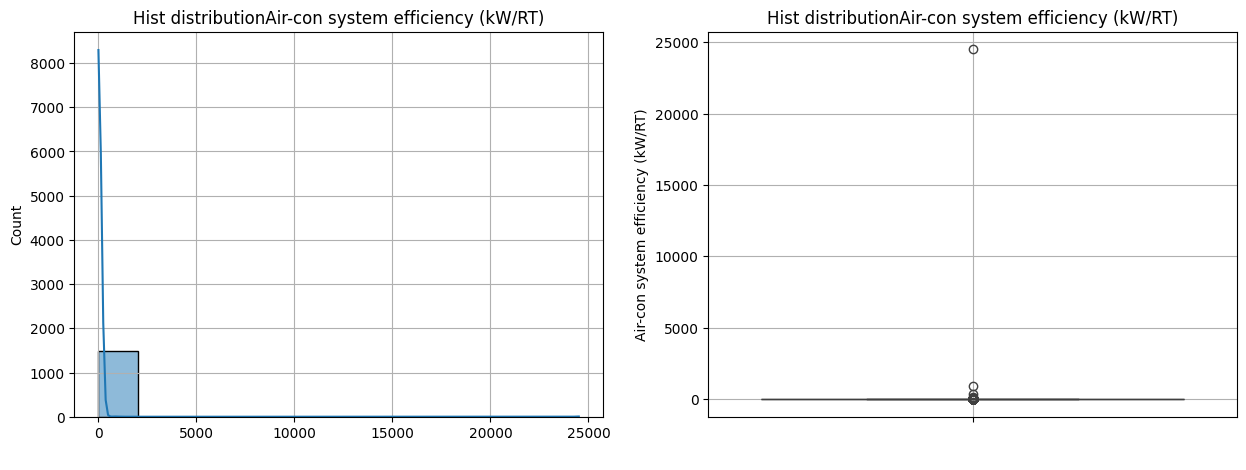

In [107]:
#Multiple plot of numeric columns and 

for i in num:

    #Iterate through all the data values 
    figure,axes = plt.subplots(1,2,figsize=(15,5))
    sns.histplot(df[i],ax=axes[0],kde=True)
    axes[0].set_title(f"Hist distribution{i}")
    axes[0].grid(True)
    axes[0].set_xlabel(" ")

    #box plot
    sns.boxplot(df[i],ax=axes[1])
    axes[1].set_title(f"Hist distribution{i}")
    axes[1].grid(True)
    axes[1].set_xlabel(" ")

<Figure size 2000x600 with 0 Axes>

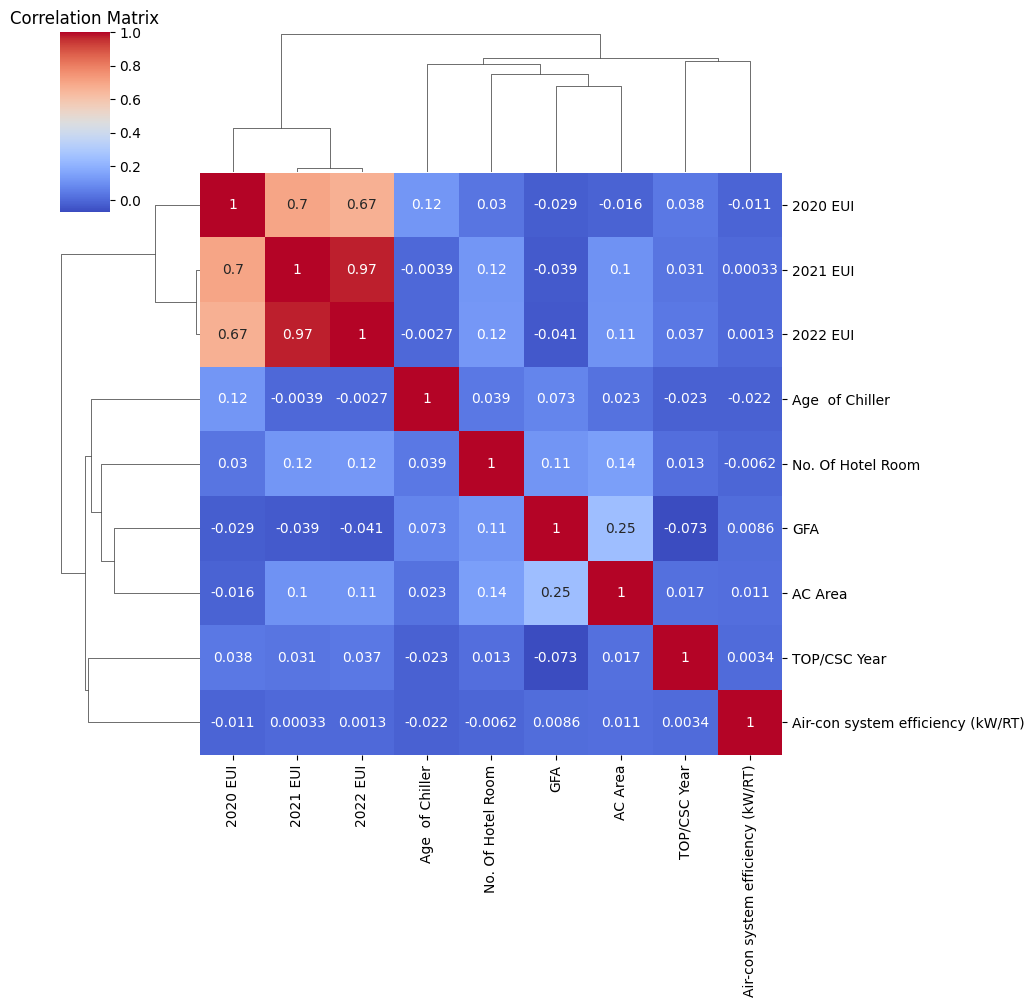

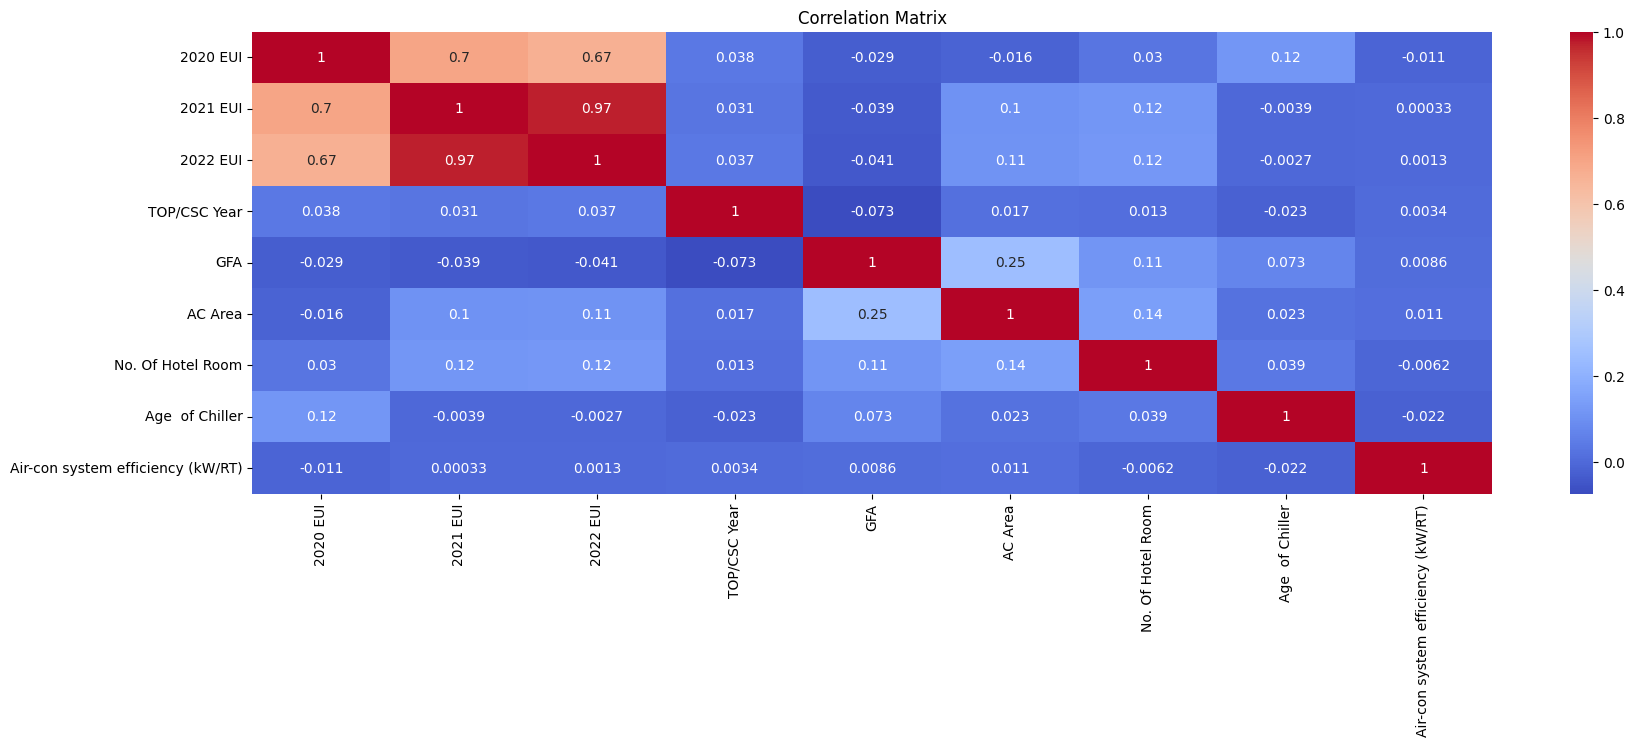

In [108]:
corr = df.select_dtypes(include=['int','float']).corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(20, 6))
sns.clustermap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


plt.figure(figsize=(20, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## The correlation matrix provides several insights into the relationships between various factors related to energy use intensity (EUI) and hotel characteristics. Here are the key insights:

1. Strong Correlation between EUI Values:
    - There is a strong positive correlation between the EUI values of different years
        - 2020 EUI and 2021 EUI have a correlation of 0.7.
        - 2020 EUI and 2022 EUI have a correlation of 0.67.
        - 2021 EUI and 2022 EUI have a very strong correlation of 0.97.
    - This suggests that the EUI values are consistent over the years, indicating stable energy consumption patterns or similar operational conditions over these years.

2. Weak Correlation with TOP/CSC Year:
    - The TOP/CSC Year shows very weak correlations with EUI values (0.038 with 2020 EUI, 0.031 with 2021 EUI, and 0.037 with 2022 EUI)..
    - This indicates that the year of construction or major renovation does not significantly impact the EUI.

3. Number of Hotel Rooms:
    - The number of hotel rooms has a very weak correlation with EUI values (0.03 with 2020 EUI, 0.12 with 2021 EUI, and 0.12 with 2022 EUI).
    - This suggests that the size of the hotel (in terms of room count) does not have a strong impact on energy usage intensity.

4. Age of Chiller:
    - The age of the chiller shows weak correlations with EUI values (0.12 with 2020 EUI, -0.0039 with 2021 EUI, and -0.0027 with 2022 EUI).
    - This indicates that the age of the chiller has minimal impact on the energy usage intensity.

5. Air-conditioning System Efficiency
    - The efficiency of the air-conditioning system (measured in kW/RT) has almost no correlation with EUI values (-0.011 with 2020 EUI, 0.00033 with 2021 EUI, and 0.0013 with 2022 EUI).
    - This suggests that air-conditioning system efficiency, as measured, does not significantly influence overall energy usage intensity in these hotels

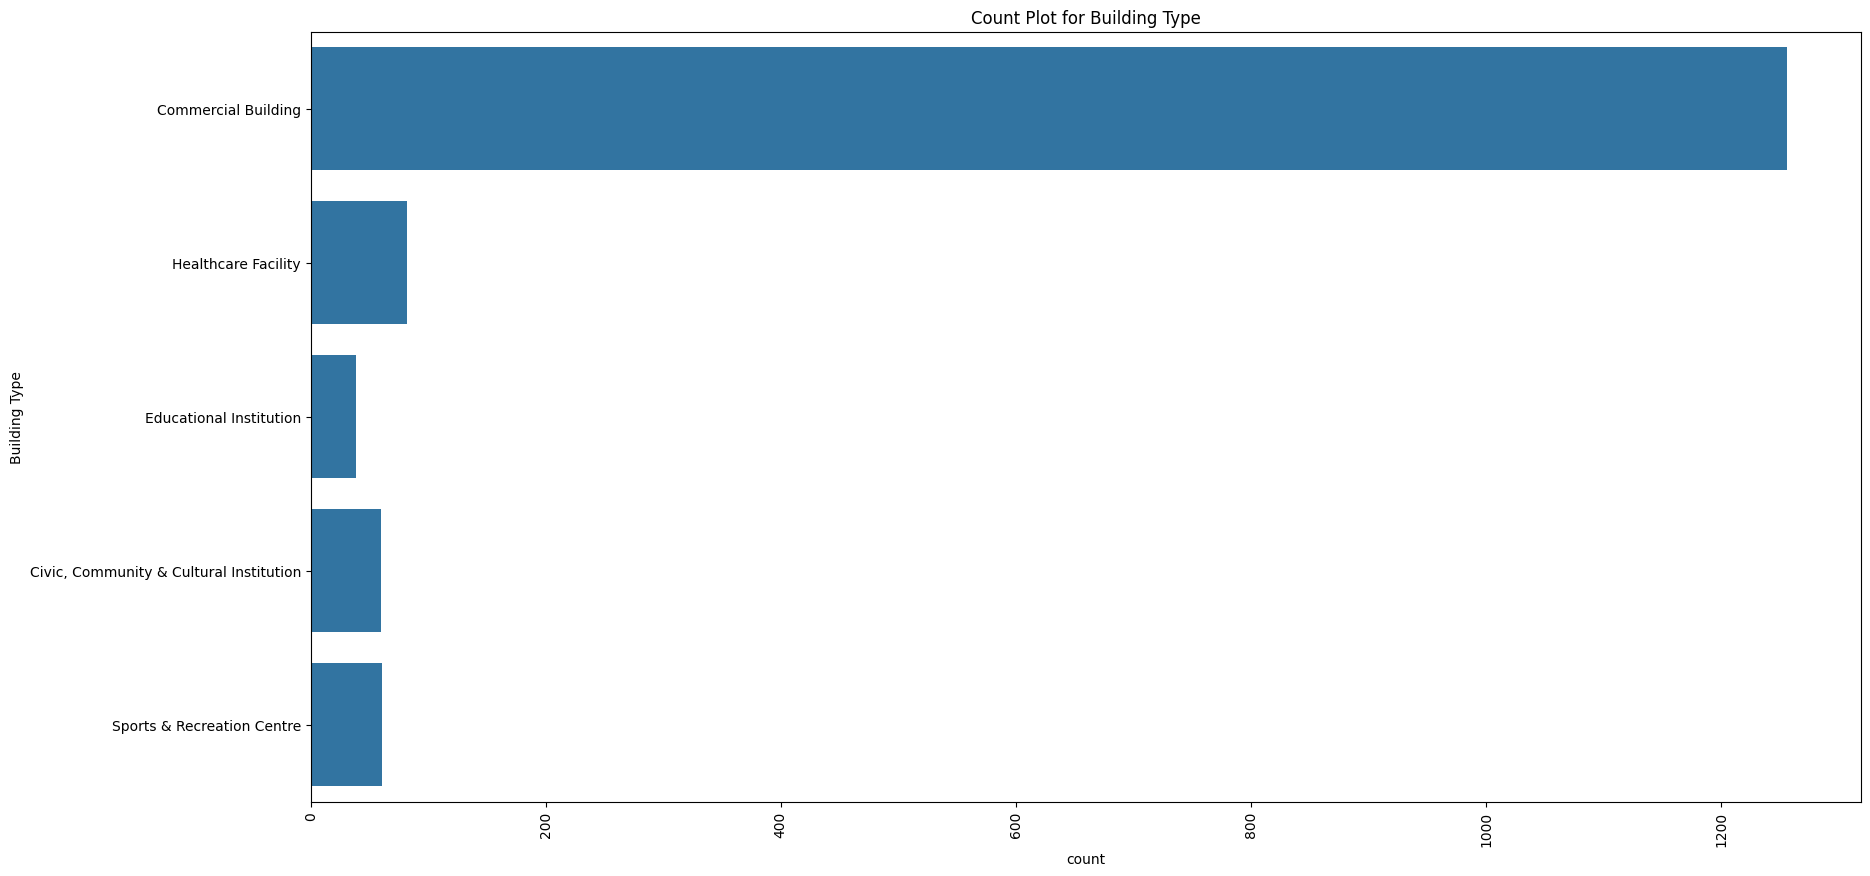

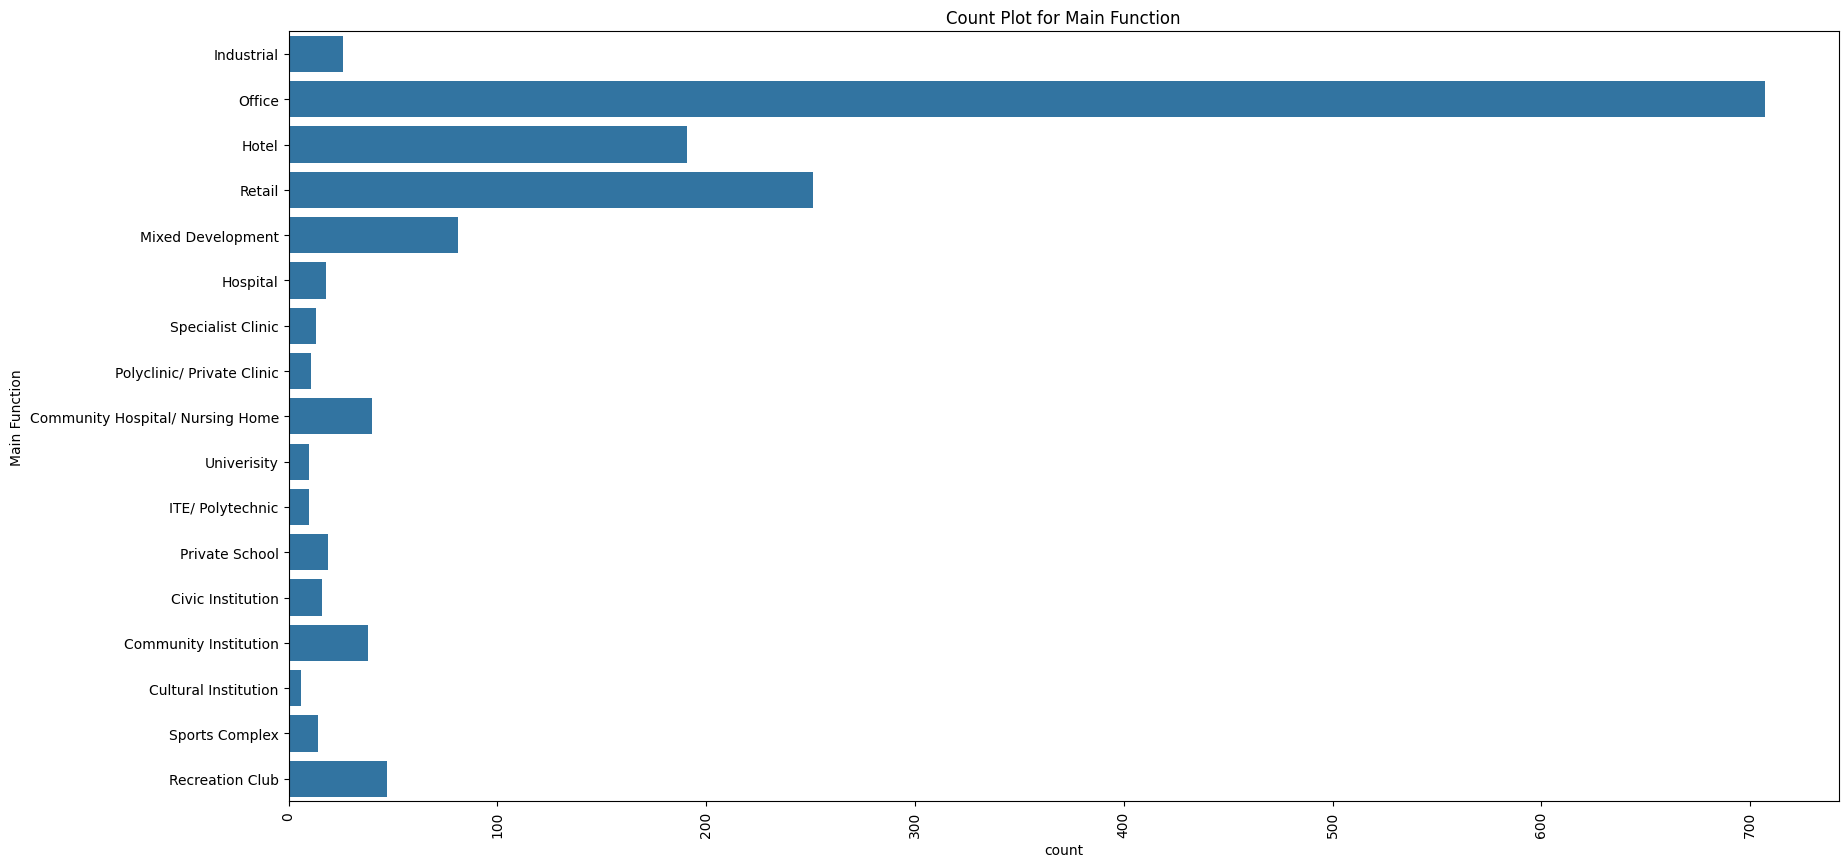

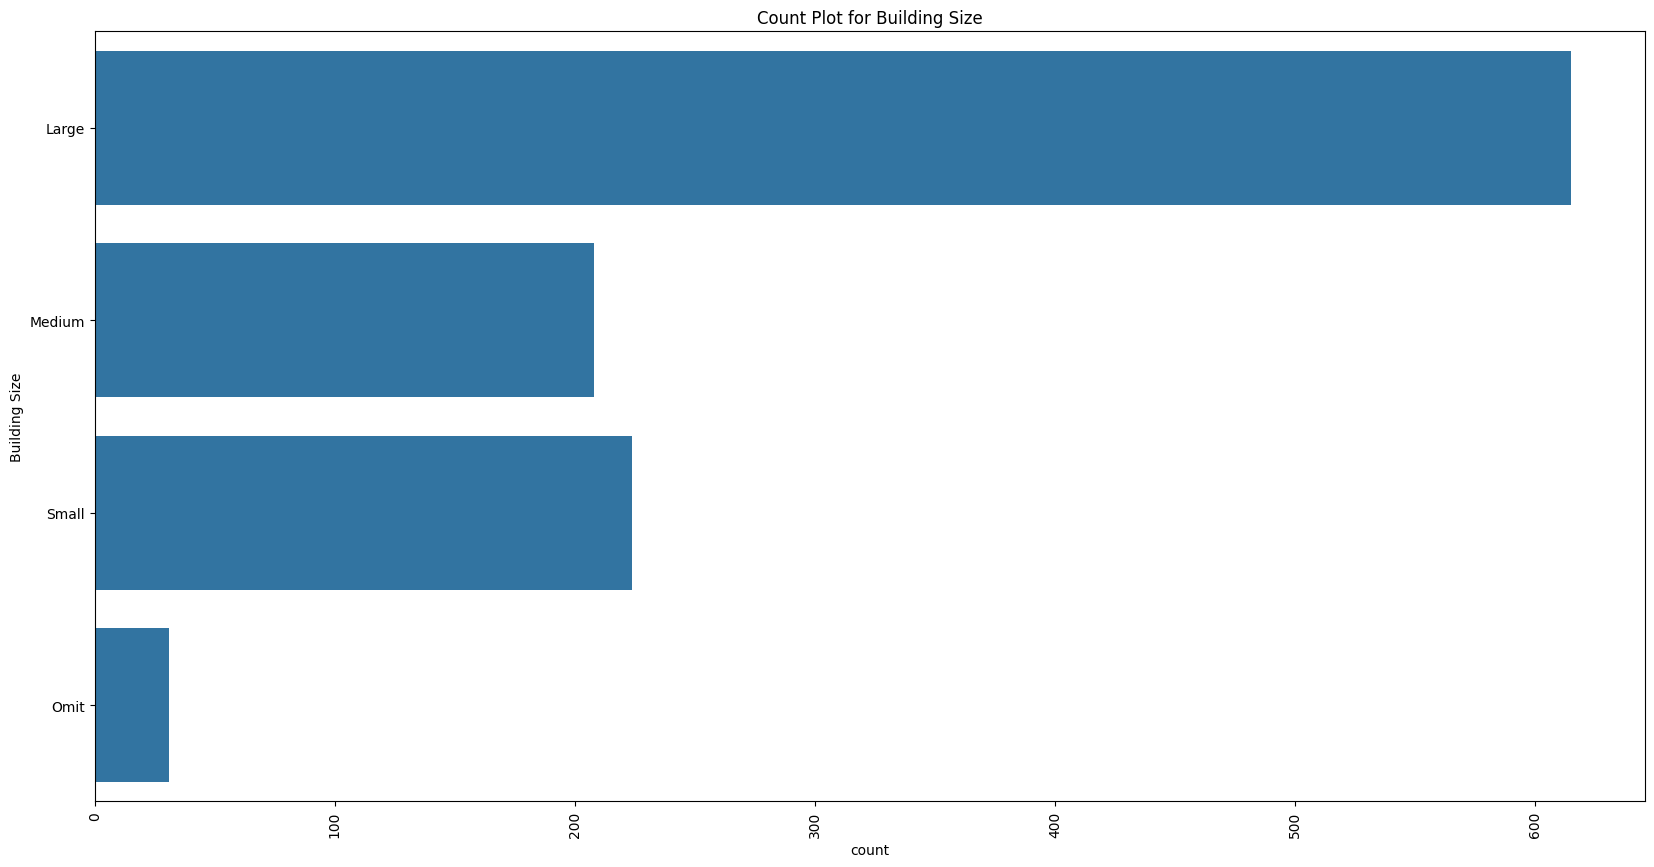

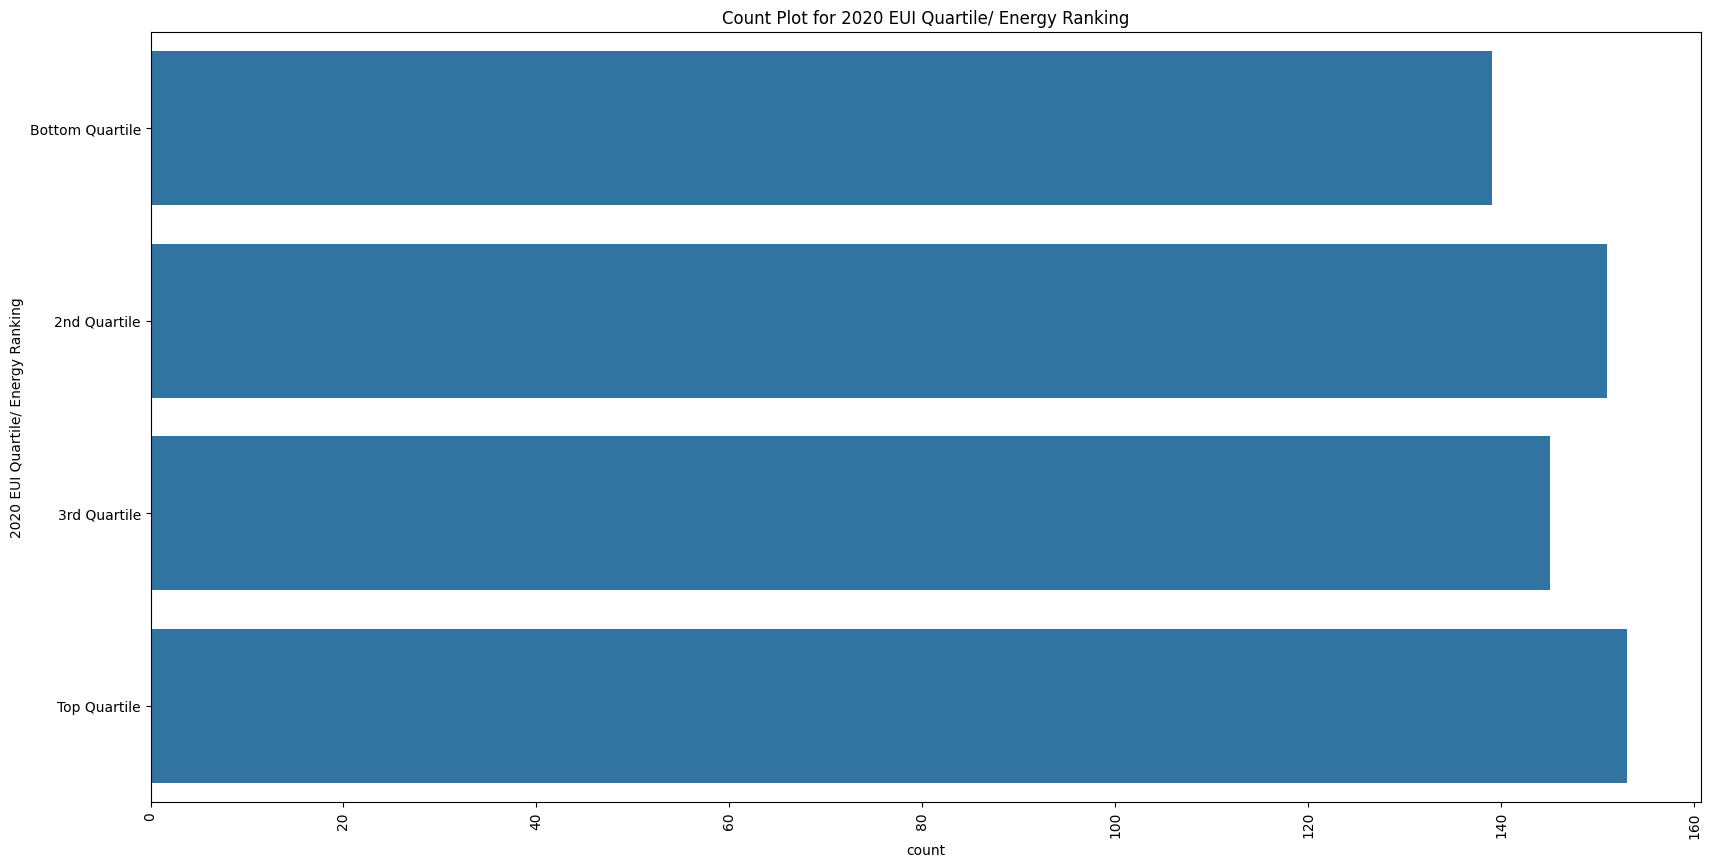

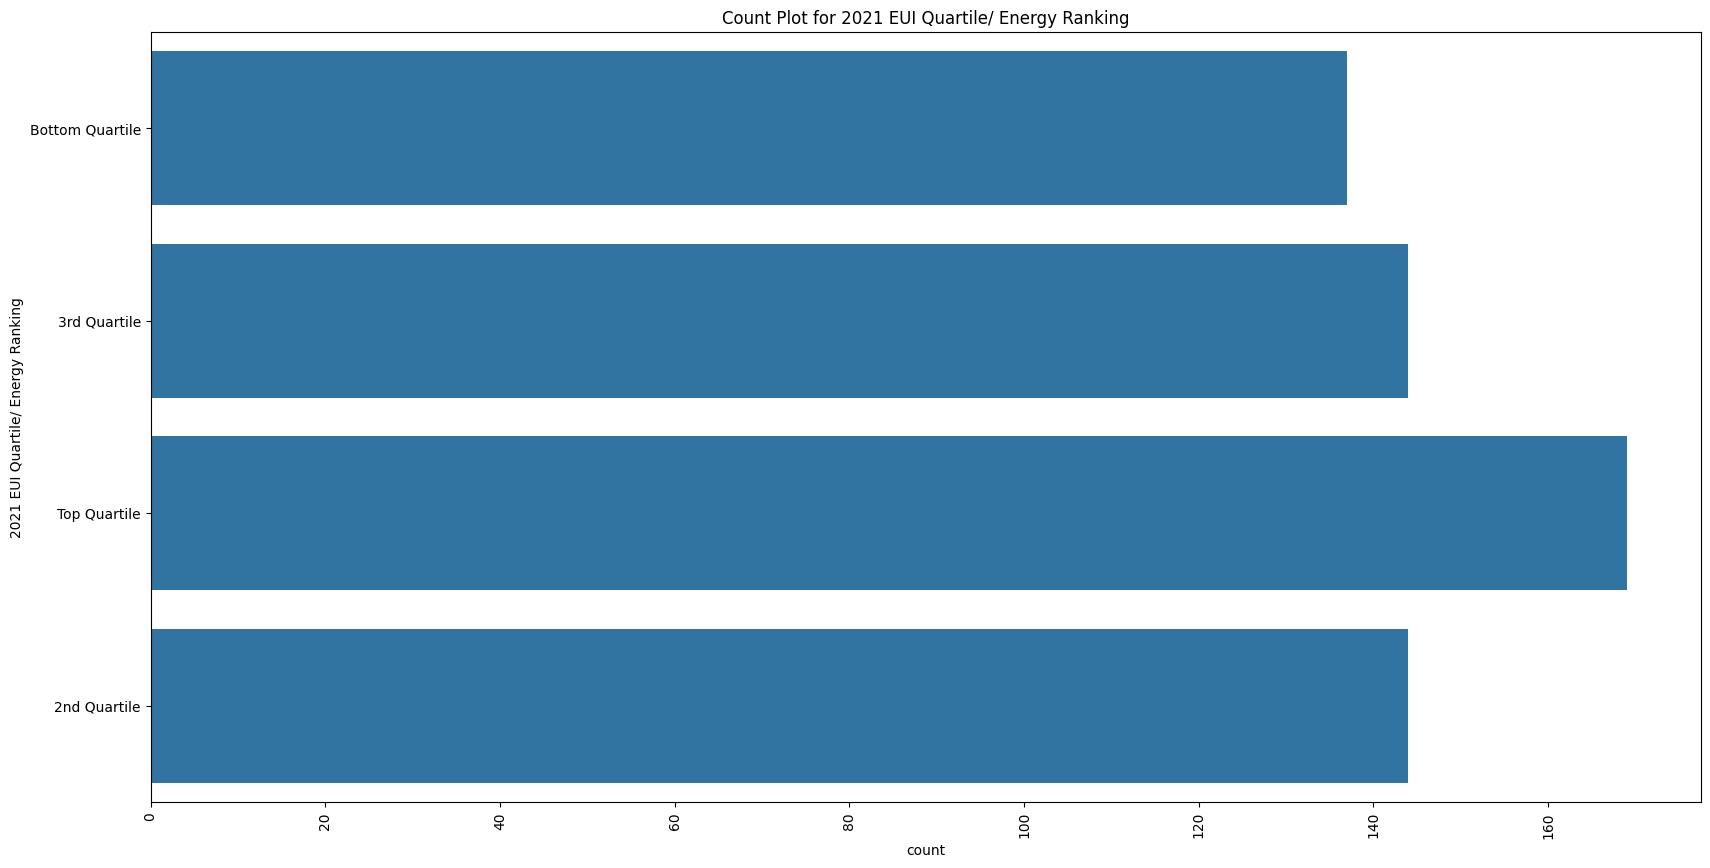

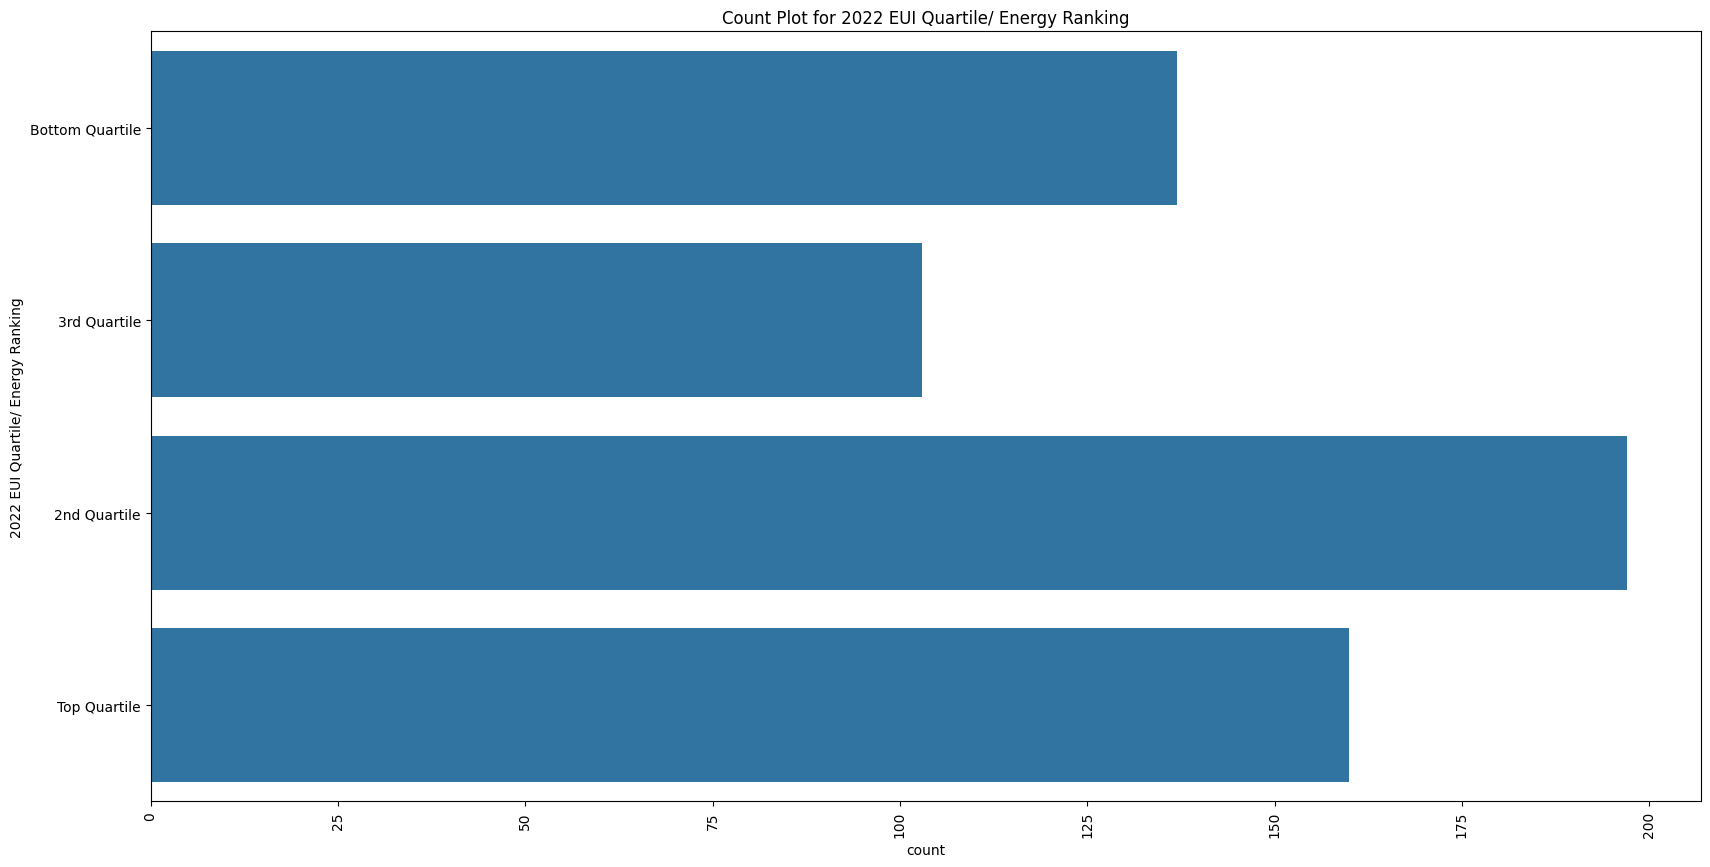

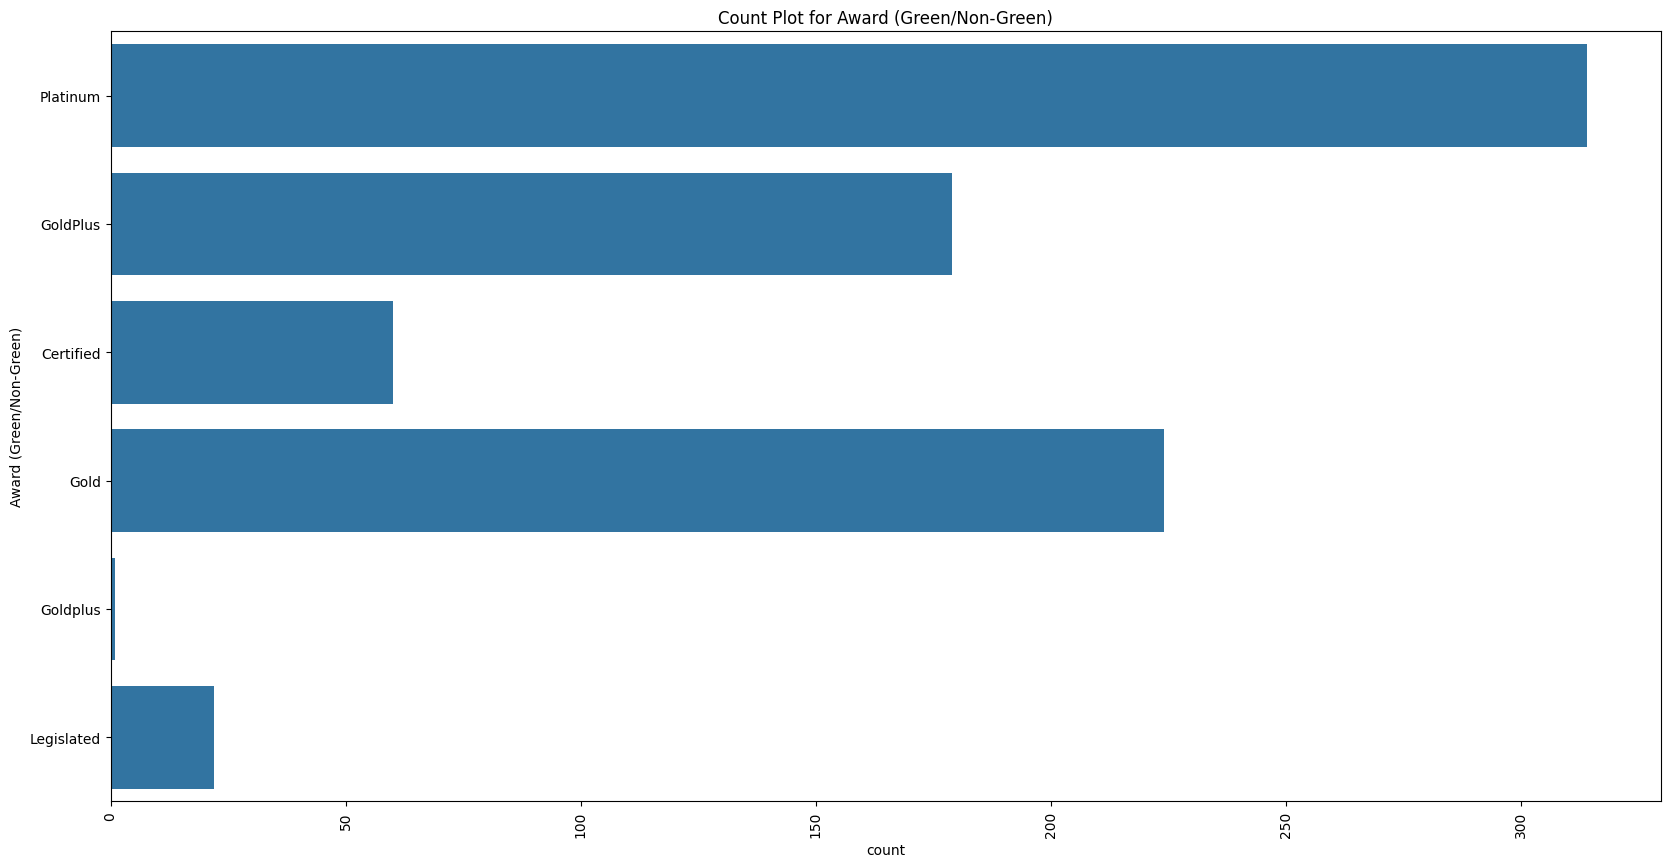

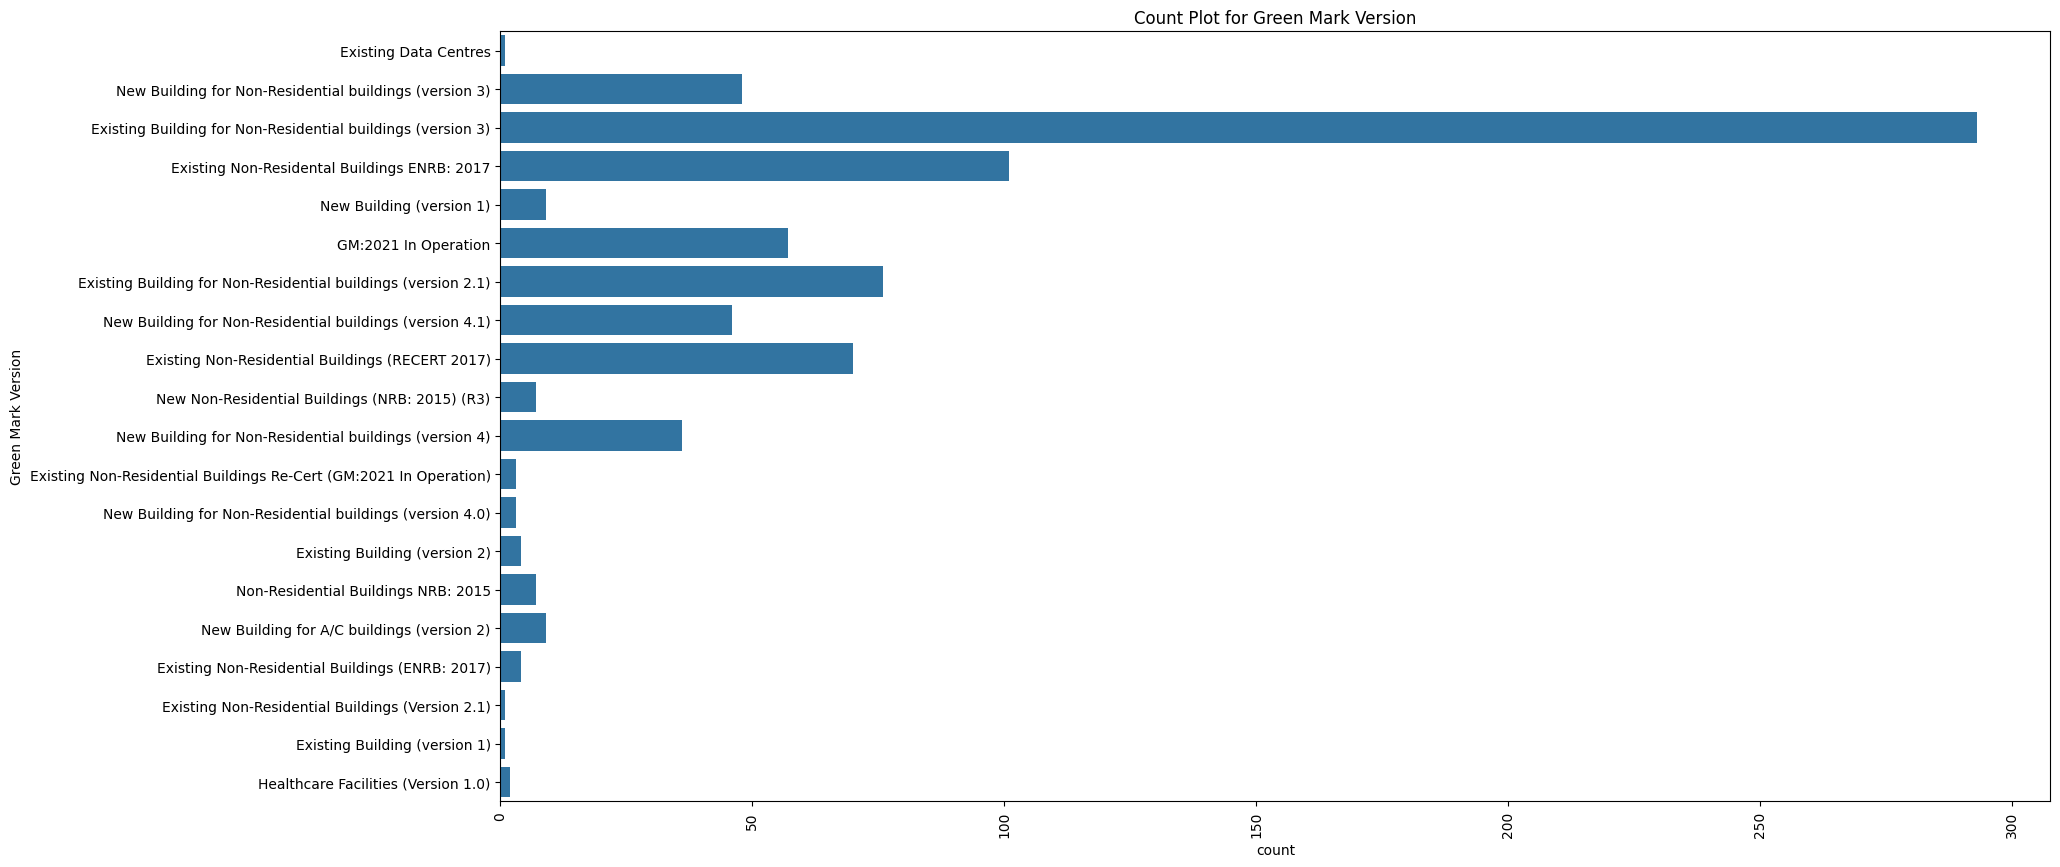

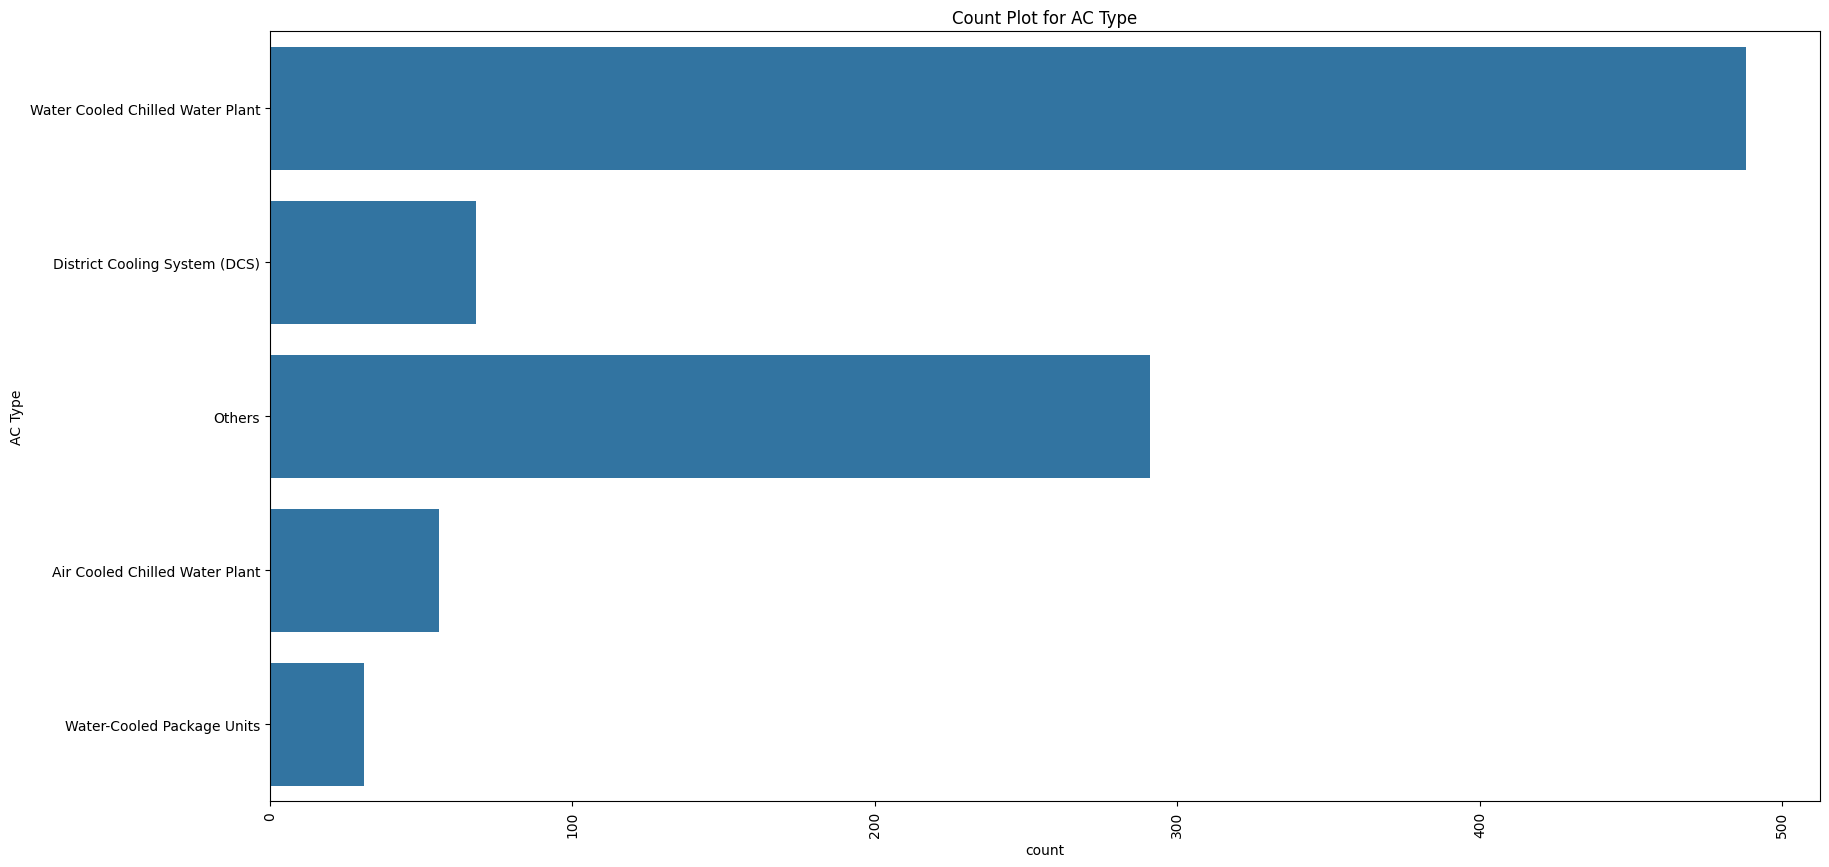

In [109]:
for col in cat:
    plt.figure(figsize=(20, 10))
    sns.countplot(y=df[col])
    plt.title(f'Count Plot for {col}')
    plt.xticks(rotation = 90)
    plt.show()

In [110]:
#Define function to make bivariate graphs
def multiple_category_count_plot(dataframe,first_dimension,horizontal_label,second_dimension):

    plt.figure(figsize=(20,10))
    sns.barplot(x=horizontal_label,
                y=first_dimension,
                hue=second_dimension,
                data=df.groupby([first_dimension, 
                second_dimension]).size().to_frame(horizontal_label).reset_index())
    plt.title(f"{first_dimension} - {second_dimension}")
    plt.show()

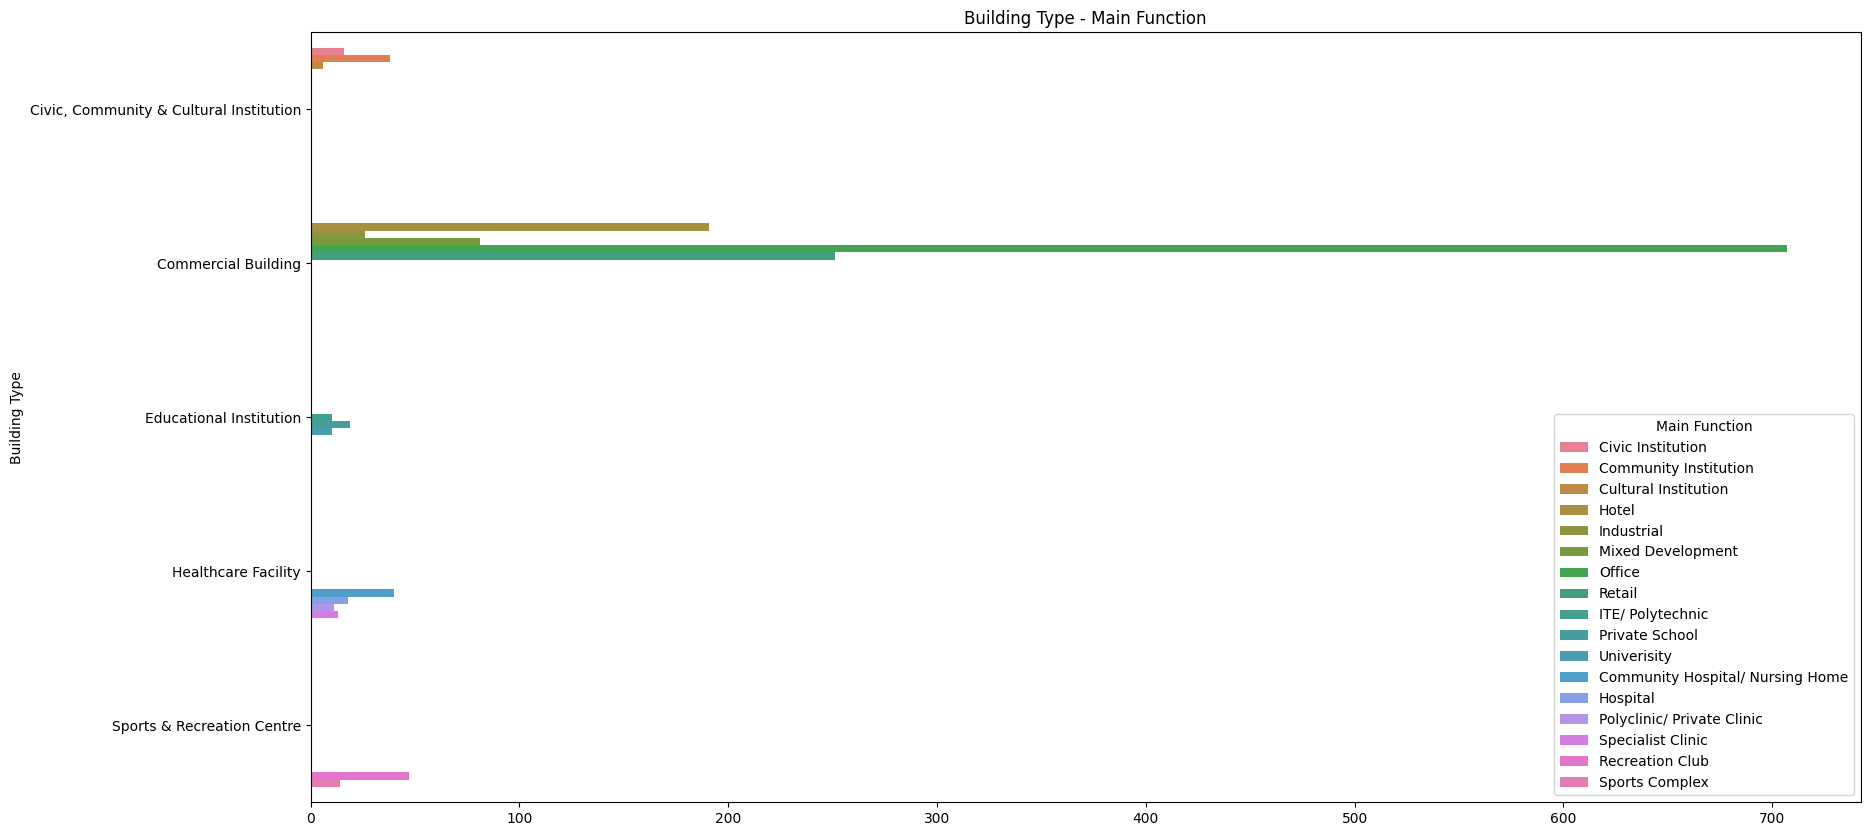

In [111]:
multiple_category_count_plot(df,'Building Type',"",'Main Function')

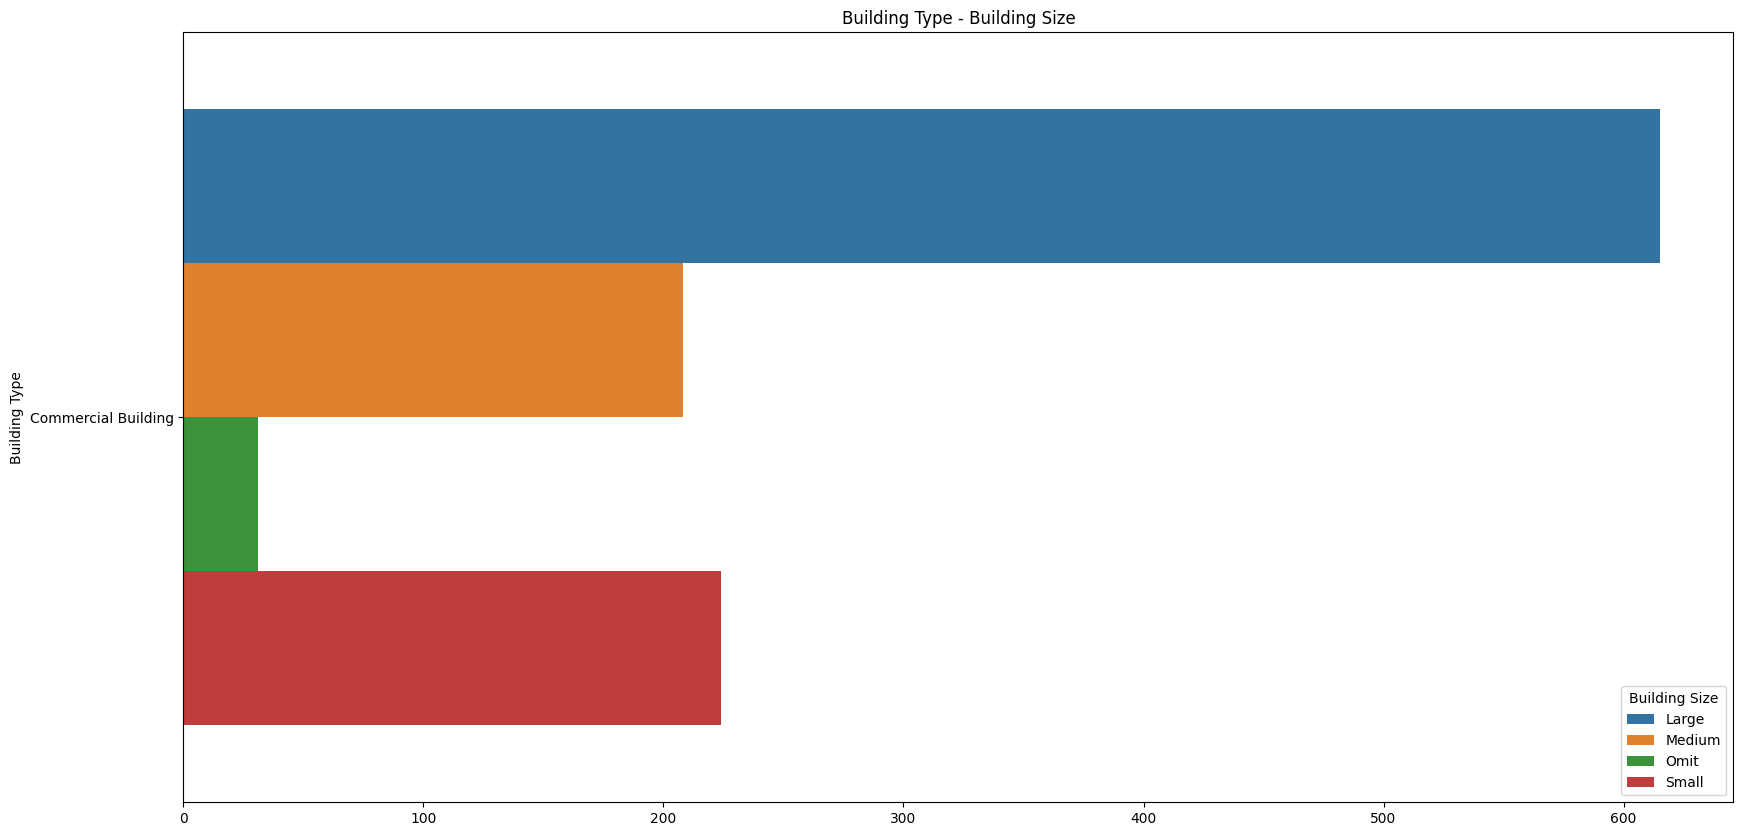

In [112]:
multiple_category_count_plot(df,'Building Type',"",'Building Size')

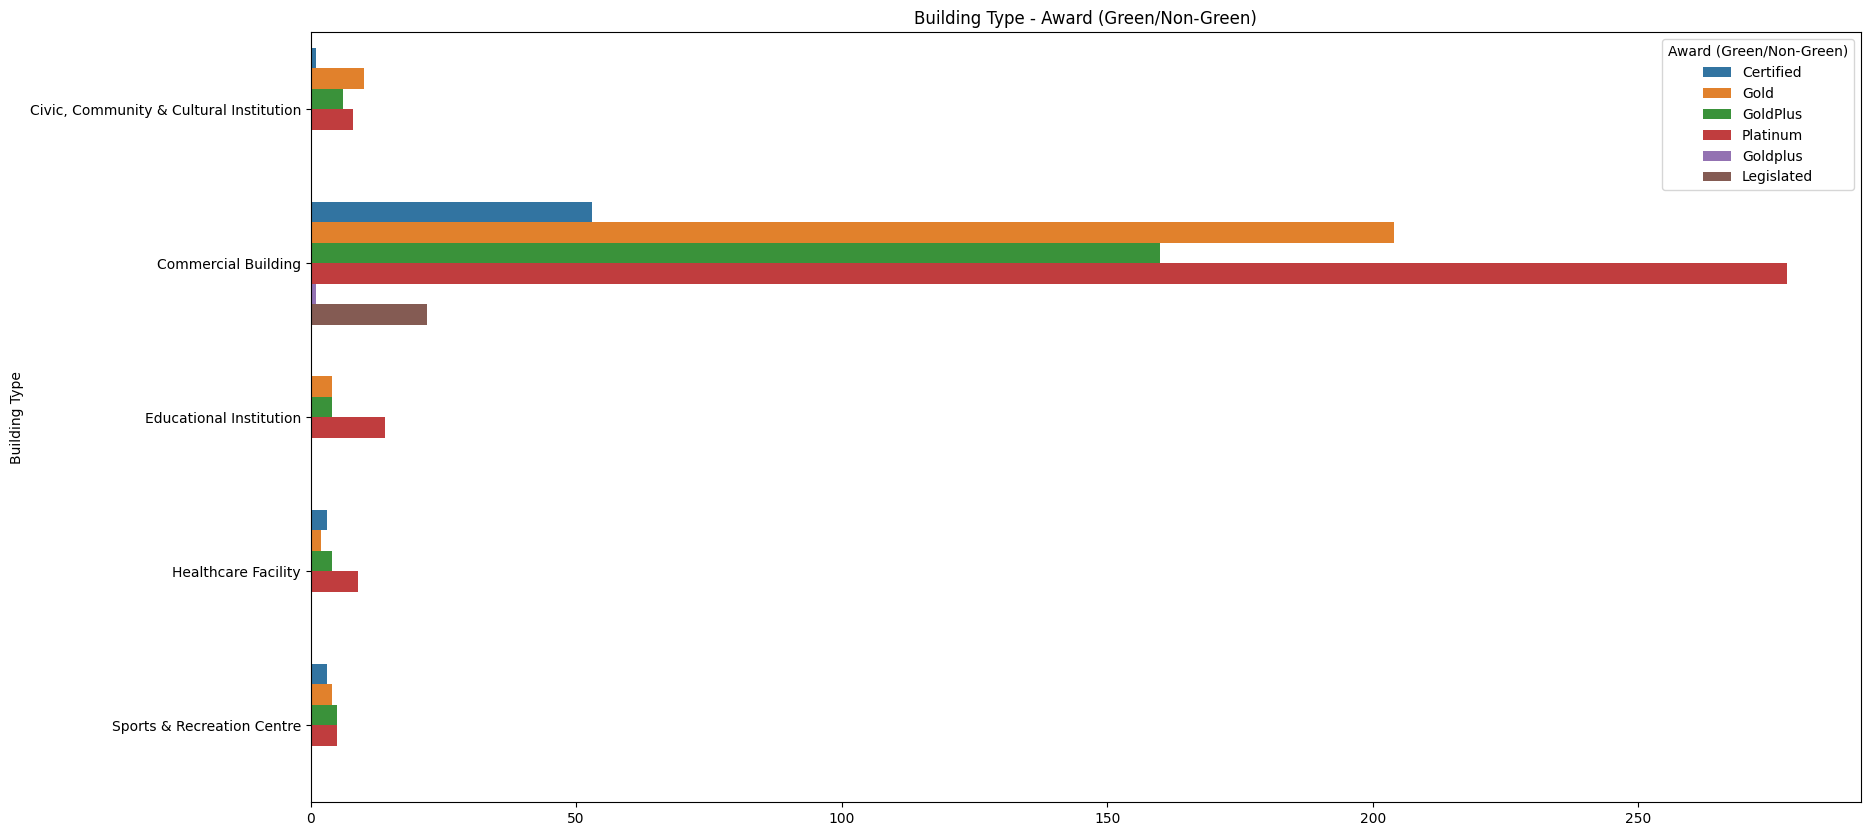

In [113]:
multiple_category_count_plot(df,'Building Type',"",'Award (Green/Non-Green)')

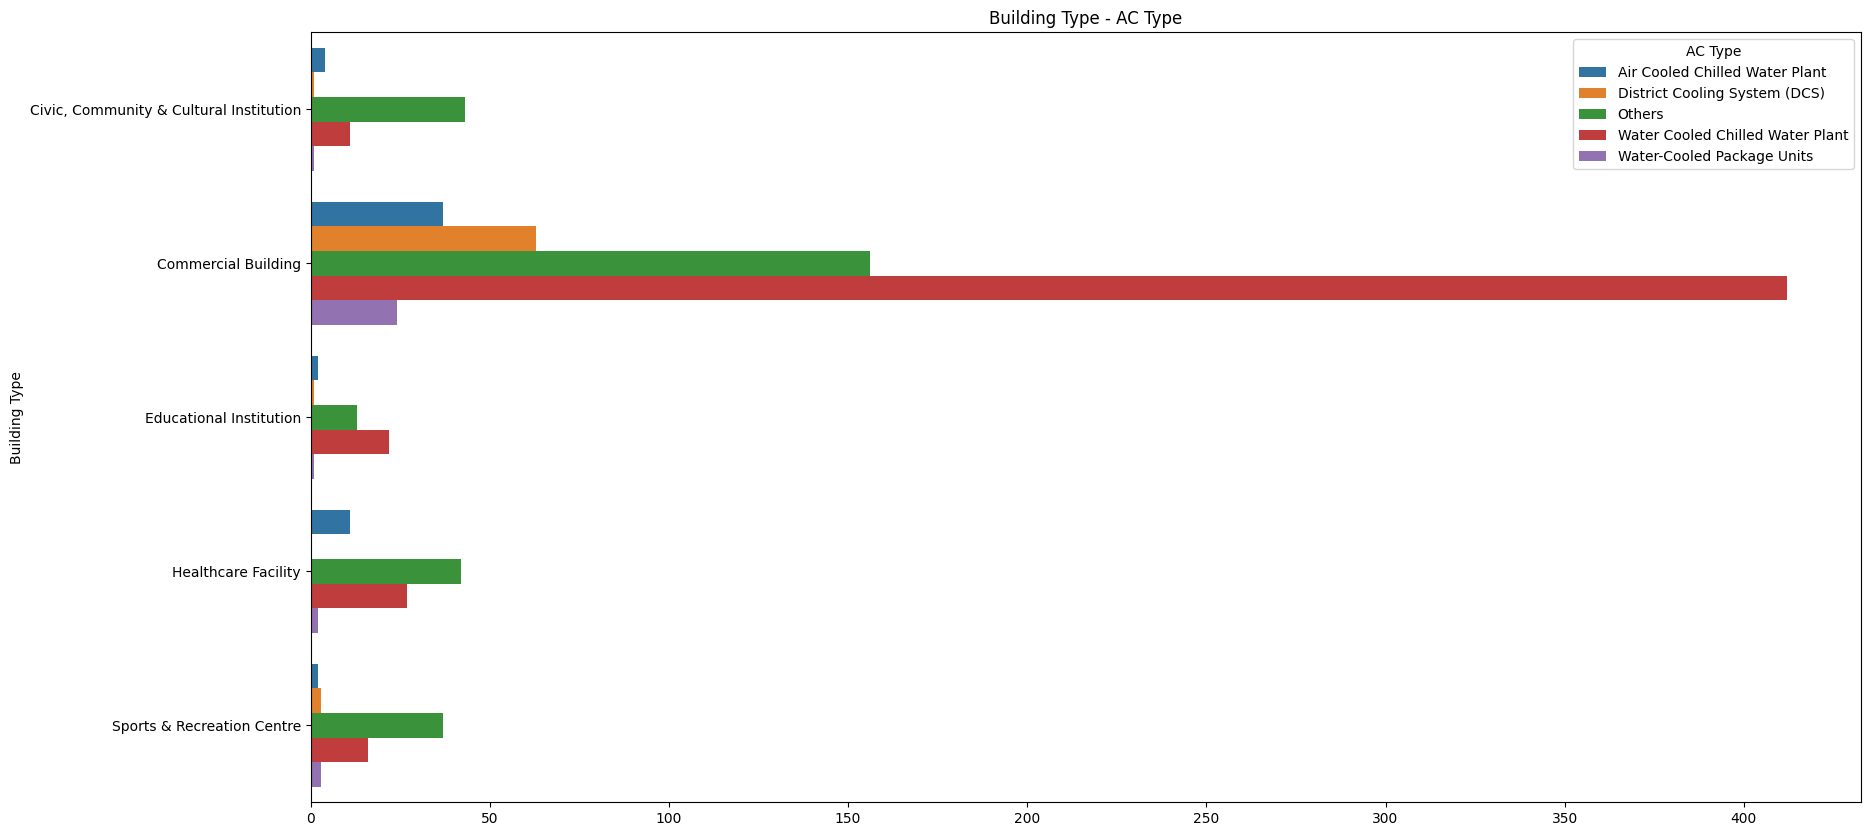

In [114]:
multiple_category_count_plot(df,'Building Type',"",'AC Type')

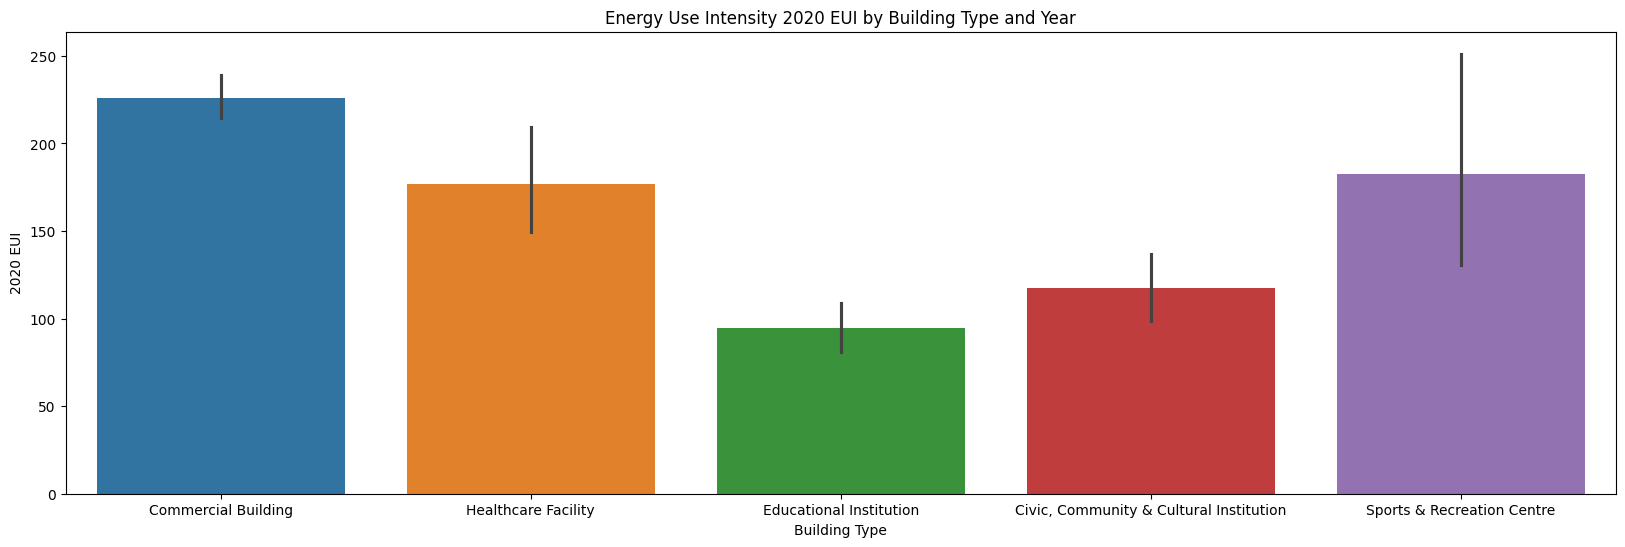

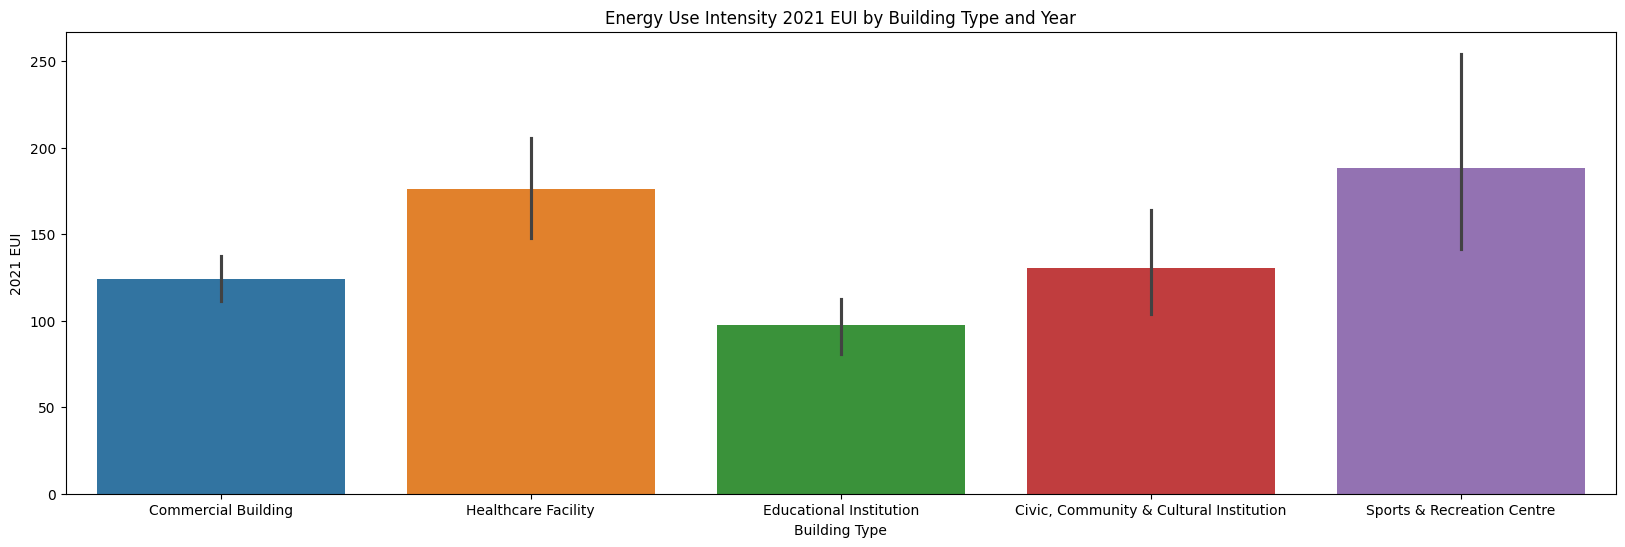

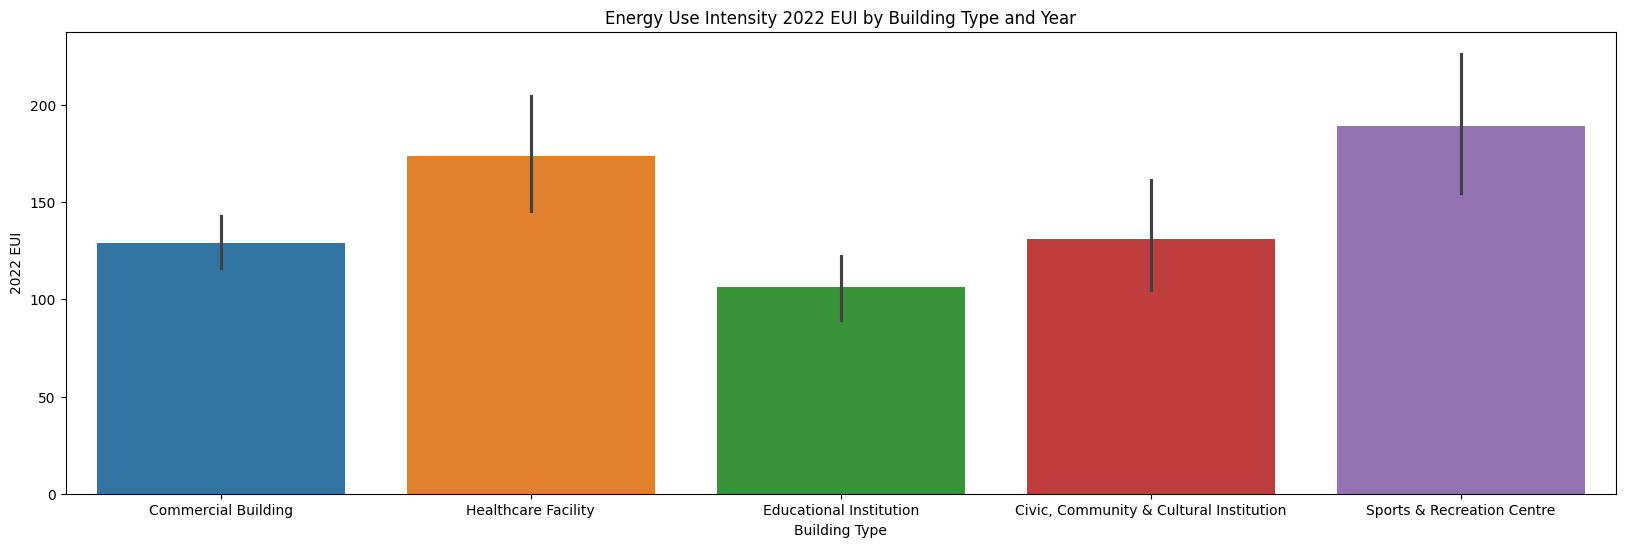

In [115]:
# Set the size of the plot
plt.figure(figsize=(20, 6))
# Create the bar plot
sns.barplot(data=df, x='Building Type', y='2020 EUI', hue='Building Type')
# Set the title of the plot
plt.title('Energy Use Intensity 2020 EUI by Building Type and Year')
# Show the plot
plt.show()
plt.figure(figsize=(20, 6))
# Create the bar plot
sns.barplot(data=df, x='Building Type', y='2021 EUI', hue='Building Type')
# Set the title of the plot
plt.title('Energy Use Intensity 2021 EUI by Building Type and Year')
# Show the plot
plt.show()
plt.figure(figsize=(20, 6))
# Create the bar plot
sns.barplot(data=df, x='Building Type', y='2022 EUI', hue='Building Type')
# Set the title of the plot
plt.title('Energy Use Intensity 2022 EUI by Building Type and Year')
# Show the plot
plt.show()

<Figure size 2000x600 with 0 Axes>

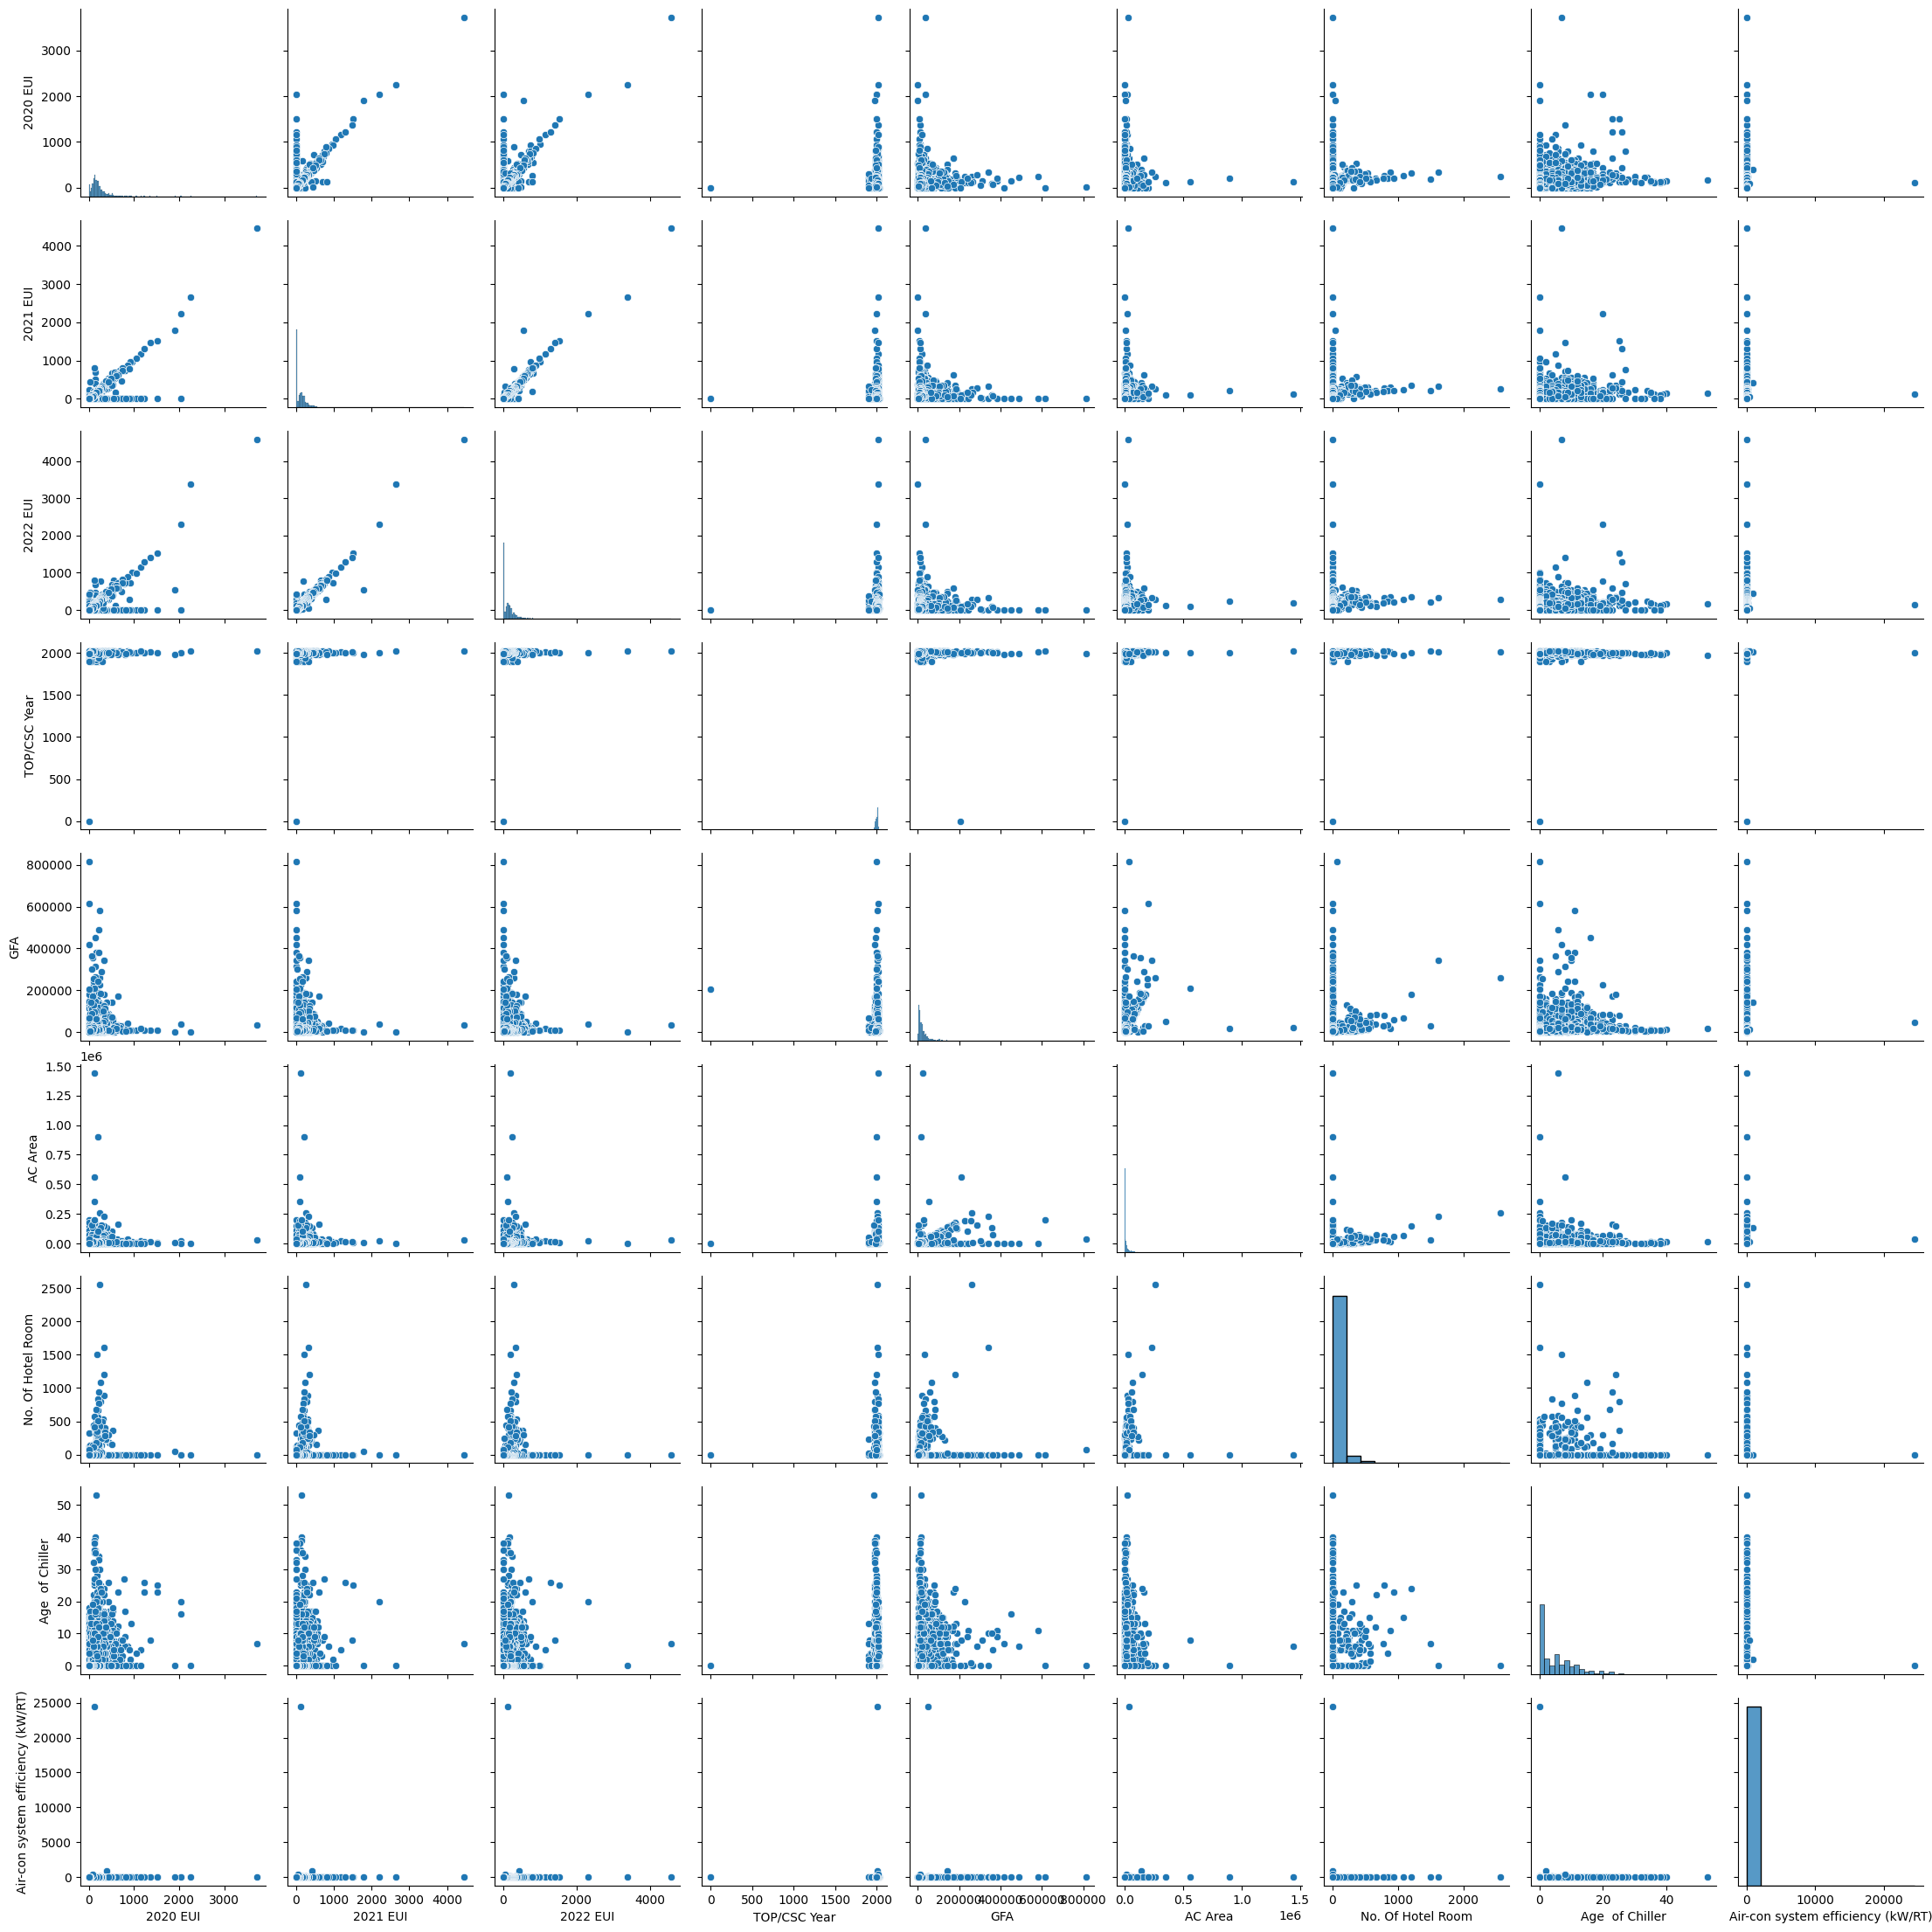

In [116]:
plt.figure(figsize=(20,6))
sns.pairplot(data=df)
plt.show()

In [117]:
# Label Encoding for specific columns
le = LabelEncoder()
df['2020 EUI Quartile/ Energy Ranking'] = le.fit_transform(df['2020 EUI Quartile/ Energy Ranking'])
df['2021 EUI Quartile/ Energy Ranking'] = le.fit_transform(df['2021 EUI Quartile/ Energy Ranking'])
df['2022 EUI Quartile/ Energy Ranking'] = le.fit_transform(df['2022 EUI Quartile/ Energy Ranking'])
df['Award (Green/Non-Green)'] = le.fit_transform(df['Award (Green/Non-Green)'])

In [118]:
# Target Encoding for high-cardinality features

def target_encode(df, target_column, columns_to_encode):
    encoder = TargetEncoder(cols=columns_to_encode)
    df_encoded = df.copy()
    df_encoded[columns_to_encode] = encoder.fit_transform(df[columns_to_encode], df[target_column])
    return df_encoded

# Columns to encode
columns_to_encode = ['Green Mark Version', 'AC Type']
target_column = '2022 EUI'

# Apply target encoding
df_encoded = target_encode(df, target_column, columns_to_encode)

In [119]:
df_encoded.head()

,Building Type,Main Function,Building Size,2020 EUI,2020 EUI Quartile/ Energy Ranking,2021 EUI,2021 EUI Quartile/ Energy Ranking,2022 EUI,2022 EUI Quartile/ Energy Ranking,TOP/CSC Year,Award (Green/Non-Green),Green Mark Version,GFA,AC Area,No. Of Hotel Room,AC Type,Age of Chiller,Air-con system efficiency (kW/RT)
0,Commercial Building,Industrial,Large,3725.0,4,4453,4,4580,4,2015,5,711.825828,35218.0,28536.0,0,247.790984,7.0,0.744
1,Commercial Building,Industrial,Large,2044.0,2,2214,2,2305,2,1999,6,134.741667,38349.0,20000.0,0,247.790984,20.0,0.000
2,Commercial Building,Industrial,Large,1157.0,2,1182,2,1151,2,2014,5,144.347132,19173.0,19173.0,0,247.790984,5.0,0.578
3,Commercial Building,Office,Large,553.0,2,661,2,805,2,1986,6,134.741667,15819.0,12724.0,0,247.790984,0.0,0.000
4,Commercial Building,Industrial,Large,713.0,2,712,2,724,2,1995,2,90.003413,30469.0,22476.0,0,247.790984,8.0,0.582


In [120]:
# One-Hot Encoding for other categorical features
df_encoded = pd.get_dummies(df_encoded, columns=['Building Type', 'Main Function', 'Building Size'], dtype=int)
df_encoded.drop(columns=['2020 EUI','2021 EUI','2020 EUI Quartile/ Energy Ranking','2021 EUI Quartile/ Energy Ranking','2022 EUI Quartile/ Energy Ranking'],axis=1,inplace=True)

Cleaned Mean Squared Error (MSE): 2922.93
Cleaned Mean Absolute Error (MAE): 32.70
Cleaned R^2 Score: 0.78


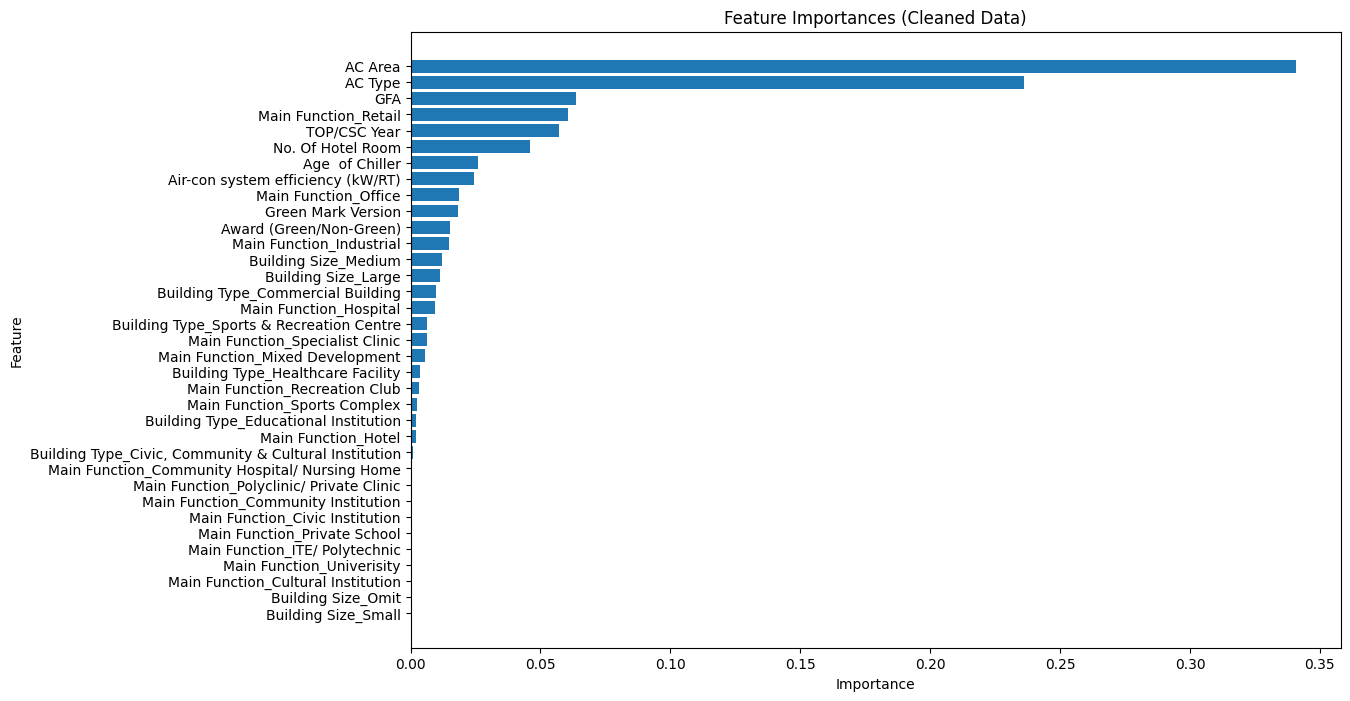

In [125]:
# Preprocess your DataFrame
# For this example, let's assume the target variable is 'target' and it's a classification task
from sklearn.ensemble import RandomForestClassifier
target = '2022 EUI'
features = df_encoded.drop(columns=[target])
labels = df_encoded[target]
# Calculate the first and third quartiles

Q1 = np.percentile(labels, 25)
Q3 = np.percentile(labels, 75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the outlier step
outlier_step = 1.5 * IQR

# Identify outliers
outliers_indices = labels[(labels < Q1 - outlier_step) | (labels > Q3 + outlier_step)].index

# Remove outliers
df_cleaned = df_encoded.drop(outliers_indices)

# Reassign features and labels
features_cleaned = df_cleaned.drop(columns=[target])
labels_cleaned = df_cleaned[target]

# Split the cleaned data into training and testing sets
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(features_cleaned, labels_cleaned, test_size=0.2, random_state=42)

# Train a Random Forest model on the cleaned data
rf_cleaned = RandomForestRegressor(n_estimators=100, random_state=42)
rf_cleaned.fit(X_train_cleaned, y_train_cleaned)

# Make predictions on the cleaned test data
y_pred_cleaned = rf_cleaned.predict(X_test_cleaned)

# Evaluate the model's performance on the cleaned data
mse_cleaned = mean_squared_error(y_test_cleaned, y_pred_cleaned)
mae_cleaned = mean_absolute_error(y_test_cleaned, y_pred_cleaned)
r2_cleaned = r2_score(y_test_cleaned, y_pred_cleaned)

print(f'Cleaned Mean Squared Error (MSE): {mse_cleaned:.2f}')
print(f'Cleaned Mean Absolute Error (MAE): {mae_cleaned:.2f}')
print(f'Cleaned R^2 Score: {r2_cleaned:.2f}')
# Get feature importances for the cleaned model
importances_cleaned = rf_cleaned.feature_importances_
feature_names_cleaned = features_cleaned.columns
feature_importances_cleaned = pd.DataFrame({'feature': feature_names_cleaned, 'importance': importances_cleaned})

# Sort the features by importance
feature_importances_cleaned = feature_importances_cleaned.sort_values(by='importance', ascending=False)

# Plot the feature importances for the cleaned model
plt.figure(figsize=(12, 8))
plt.barh(feature_importances_cleaned['feature'], feature_importances_cleaned['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (Cleaned Data)')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

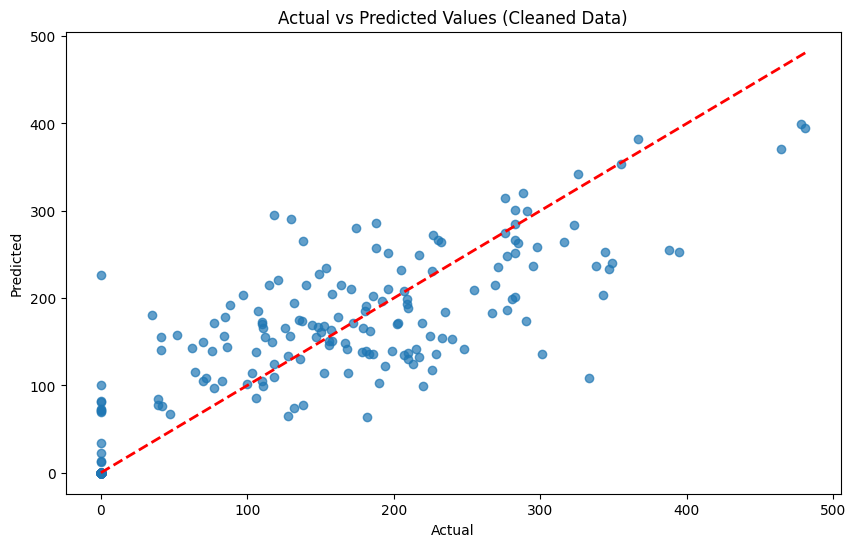

In [126]:
# Plot actual vs predicted values for the cleaned model
plt.figure(figsize=(10, 6))
plt.scatter(y_test_cleaned, y_pred_cleaned, alpha=0.7)
plt.plot([min(y_test_cleaned), max(y_test_cleaned)], [min(y_test_cleaned), max(y_test_cleaned)], '--r', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Cleaned Data)')
plt.show()

SYNTHETIC DATA

In [134]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv(r'D:\VS code files\building_energy_consumption\dataset\singapore_dataset\end_end\data\building-energy-performance-data-for-2022.csv')
df.head()

,Building Type,Main Function,Building Size,EUI2020,EUI Quartile/ Energy Ranking2020,EUI2021,EUI Quartile/ Energy Ranking 2021,EUI2022,EUI Quartile/ Energy Ranking 2022,TOP/CSC Year,Award (Green/Non-Green),Green Mark Version,GFA,AC Area,AC Area Percentage,No. Of Hotel Room,AC Type,Age of Chiller,Aircon system efficiency (kW/RT)
0,Commercial Building,Industrial,Large,3725.0,NaN,4453,NaN,4580,NaN,2015,Platinum,Existing Data Centres,"35,218","28,536",81%,0,Water Cooled Chilled Water Plant,7.0,0.744
1,Commercial Building,Industrial,Large,2044.0,Bottom Quartile,2214,Bottom Quartile,2305,Bottom Quartile,1999,NaN,NaN,"38,349","20,000",52%,0,Water Cooled Chilled Water Plant,20.0,0.000
2,Commercial Building,Industrial,Large,1157.0,Bottom Quartile,1182,Bottom Quartile,1151,Bottom Quartile,2014,Platinum,New Building for Non-Residential buildings (ve...,"19,173","19,173",100%,0,Water Cooled Chilled Water Plant,5.0,0.578
3,Commercial Building,Office,Large,553.0,Bottom Quartile,661,Bottom Quartile,805,Bottom Quartile,1986,NaN,NaN,"15,819","12,724",80%,0,Water Cooled Chilled Water Plant,0.0,0.000
4,Commercial Building,Industrial,Large,713.0,Bottom Quartile,712,Bottom Quartile,724,Bottom Quartile,1995,GoldPlus,Existing Building for Non-Residential building...,"30,469","22,476",74%,0,Water Cooled Chilled Water Plant,8.0,0.582


In [135]:
df = df[['Building Type','Main Function','Building Size','TOP/CSC Year','Award (Green/Non-Green)','Green Mark Version','GFA','AC Area','AC Type','Age  of Chiller']]
df.dropna(inplace=True)

In [136]:
columns_to_remove_comma = ['GFA','AC Area']

for col in columns_to_remove_comma:
    df[col] = df[col].astype(str).str.replace(",", "").astype(float)

df['GFA'] = df['GFA'].astype(float)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 0 to 650
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Building Type            292 non-null    object 
 1   Main Function            292 non-null    object 
 2   Building Size            292 non-null    object 
 3   TOP/CSC Year             292 non-null    int64  
 4   Award (Green/Non-Green)  292 non-null    object 
 5   Green Mark Version       292 non-null    object 
 6   GFA                      292 non-null    float64
 7   AC Area                  292 non-null    float64
 8   AC Type                  292 non-null    object 
 9   Age  of Chiller          292 non-null    float64
dtypes: float64(3), int64(1), object(6)
memory usage: 25.1+ KB


In [138]:
df.columns

Index(['Building Type', 'Main Function', 'Building Size', 'TOP/CSC Year',
       'Award (Green/Non-Green)', 'Green Mark Version', 'GFA', 'AC Area',
       'AC Type', 'Age  of Chiller'],
      dtype='object')

In [139]:
categorical_columns = ['Building Type','Main Function','Building Size','TOP/CSC Year','Award (Green/Non-Green)','Green Mark Version','GFA','AC Area','AC Type','Age  of Chiller']
print(categorical_columns)

['Building Type', 'Main Function', 'Building Size', 'TOP/CSC Year', 'Award (Green/Non-Green)', 'Green Mark Version', 'GFA', 'AC Area', 'AC Type', 'Age  of Chiller']


In [140]:
from ctgan import CTGAN

ctgan = CTGAN(verbose=True)
ctgan.fit(df,categorical_columns,epochs=200)

Gen. (1.87) | Discrim. (-0.02): 100%|██████████| 200/200 [00:57<00:00,  3.51it/s]


In [141]:
sample = ctgan.sample(2000)

In [142]:
df.shape,sample.shape

((292, 10), (2000, 10))

In [143]:
df.head()

,Building Type,Main Function,Building Size,TOP/CSC Year,Award (Green/Non-Green),Green Mark Version,GFA,AC Area,AC Type,Age of Chiller
0,Commercial Building,Industrial,Large,2015,Platinum,Existing Data Centres,35218.0,28536.0,Water Cooled Chilled Water Plant,7.0
2,Commercial Building,Industrial,Large,2014,Platinum,New Building for Non-Residential buildings (ve...,19173.0,19173.0,Water Cooled Chilled Water Plant,5.0
4,Commercial Building,Industrial,Large,1995,GoldPlus,Existing Building for Non-Residential building...,30469.0,22476.0,Water Cooled Chilled Water Plant,8.0
6,Commercial Building,Office,Large,2008,GoldPlus,Existing Building for Non-Residential building...,36007.0,25895.0,District Cooling System (DCS),0.0
7,Commercial Building,Industrial,Large,2011,Certified,Existing Non-Residental Buildings ENRB: 2017,20190.0,16870.0,Water Cooled Chilled Water Plant,12.0


In [144]:
df.isnull().sum()

Building Type              0
Main Function              0
Building Size              0
TOP/CSC Year               0
Award (Green/Non-Green)    0
Green Mark Version         0
GFA                        0
AC Area                    0
AC Type                    0
Age  of Chiller            0
dtype: int64

In [145]:
df['Building Size'].fillna('Not Given',inplace=True)
df['Award (Green/Non-Green)'].fillna('Not Given',inplace=True)
df['Green Mark Version'].fillna('Not Given',inplace=True)
df['AC Type'].fillna('Not Given',inplace=True)

In [146]:
columns_to_remove_comma = ['GFA','AC Area']

for col in columns_to_remove_comma:
    df[col] = df[col].astype(str).str.replace(",", "").astype(float)

df['GFA'] = df['GFA'].astype(float)

In [147]:
sample.head()

,Building Type,Main Function,Building Size,TOP/CSC Year,Award (Green/Non-Green),Green Mark Version,GFA,AC Area,AC Type,Age of Chiller
0,Commercial Building,Office,Large,1992,Gold,Existing Non-Residental Buildings ENRB: 2017,10960.0,11683.0,Water Cooled Chilled Water Plant,7.0
1,Commercial Building,Office,Large,1998,GoldPlus,New Building for Non-Residential buildings (ve...,11977.0,30912.0,Water Cooled Chilled Water Plant,7.0
2,Commercial Building,Office,Large,2019,Gold,New Building for A/C buildings (version 2),40061.0,18758.0,Water Cooled Chilled Water Plant,16.0
3,Commercial Building,Office,Large,2002,Gold,Existing Non-Residental Buildings ENRB: 2017,30915.0,6227.0,Water Cooled Chilled Water Plant,0.0
4,Commercial Building,Office,Medium,1999,Gold,New Building for Non-Residential buildings (ve...,49048.0,34377.0,Water Cooled Chilled Water Plant,8.0


In [148]:
sample.isnull().sum()

Building Type              0
Main Function              0
Building Size              0
TOP/CSC Year               0
Award (Green/Non-Green)    0
Green Mark Version         0
GFA                        0
AC Area                    0
AC Type                    0
Age  of Chiller            0
dtype: int64

In [149]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Building Type            2000 non-null   object 
 1   Main Function            2000 non-null   object 
 2   Building Size            2000 non-null   object 
 3   TOP/CSC Year             2000 non-null   int64  
 4   Award (Green/Non-Green)  2000 non-null   object 
 5   Green Mark Version       2000 non-null   object 
 6   GFA                      2000 non-null   float64
 7   AC Area                  2000 non-null   float64
 8   AC Type                  2000 non-null   object 
 9   Age  of Chiller          2000 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 156.4+ KB


In [150]:
sample['Building Size'].fillna('Not Given',inplace=True)
sample['Award (Green/Non-Green)'].fillna('Not Given',inplace=True)
sample['Green Mark Version'].fillna('Not Given',inplace=True)
sample['AC Type'].fillna('Not Given',inplace=True)

In [151]:
columns_to_remove_comma = ['GFA','AC Area']

for col in columns_to_remove_comma:
    sample[col] = sample[col].astype(str).str.replace(",", "").astype(float)

sample['GFA'] = sample['GFA'].astype(float)

Dataframe shape: (292, 10)
Sample shape: (2000, 10)
Columns match.
All specified categorical columns are present in the dataframe.


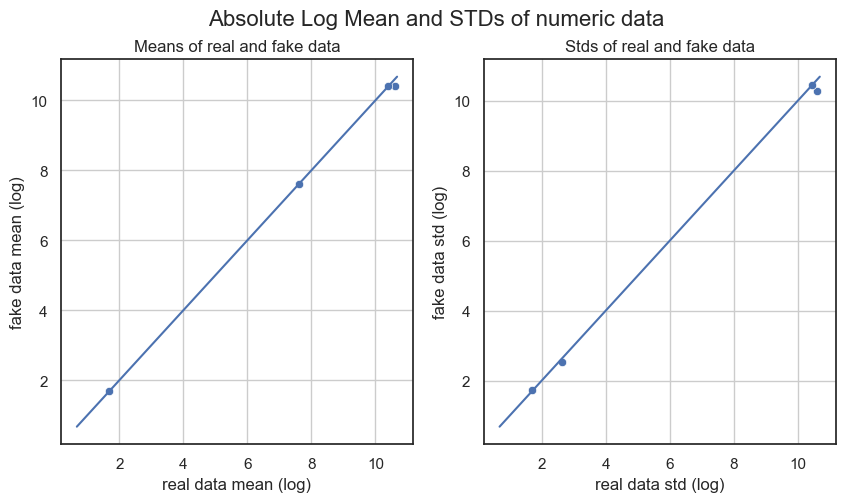

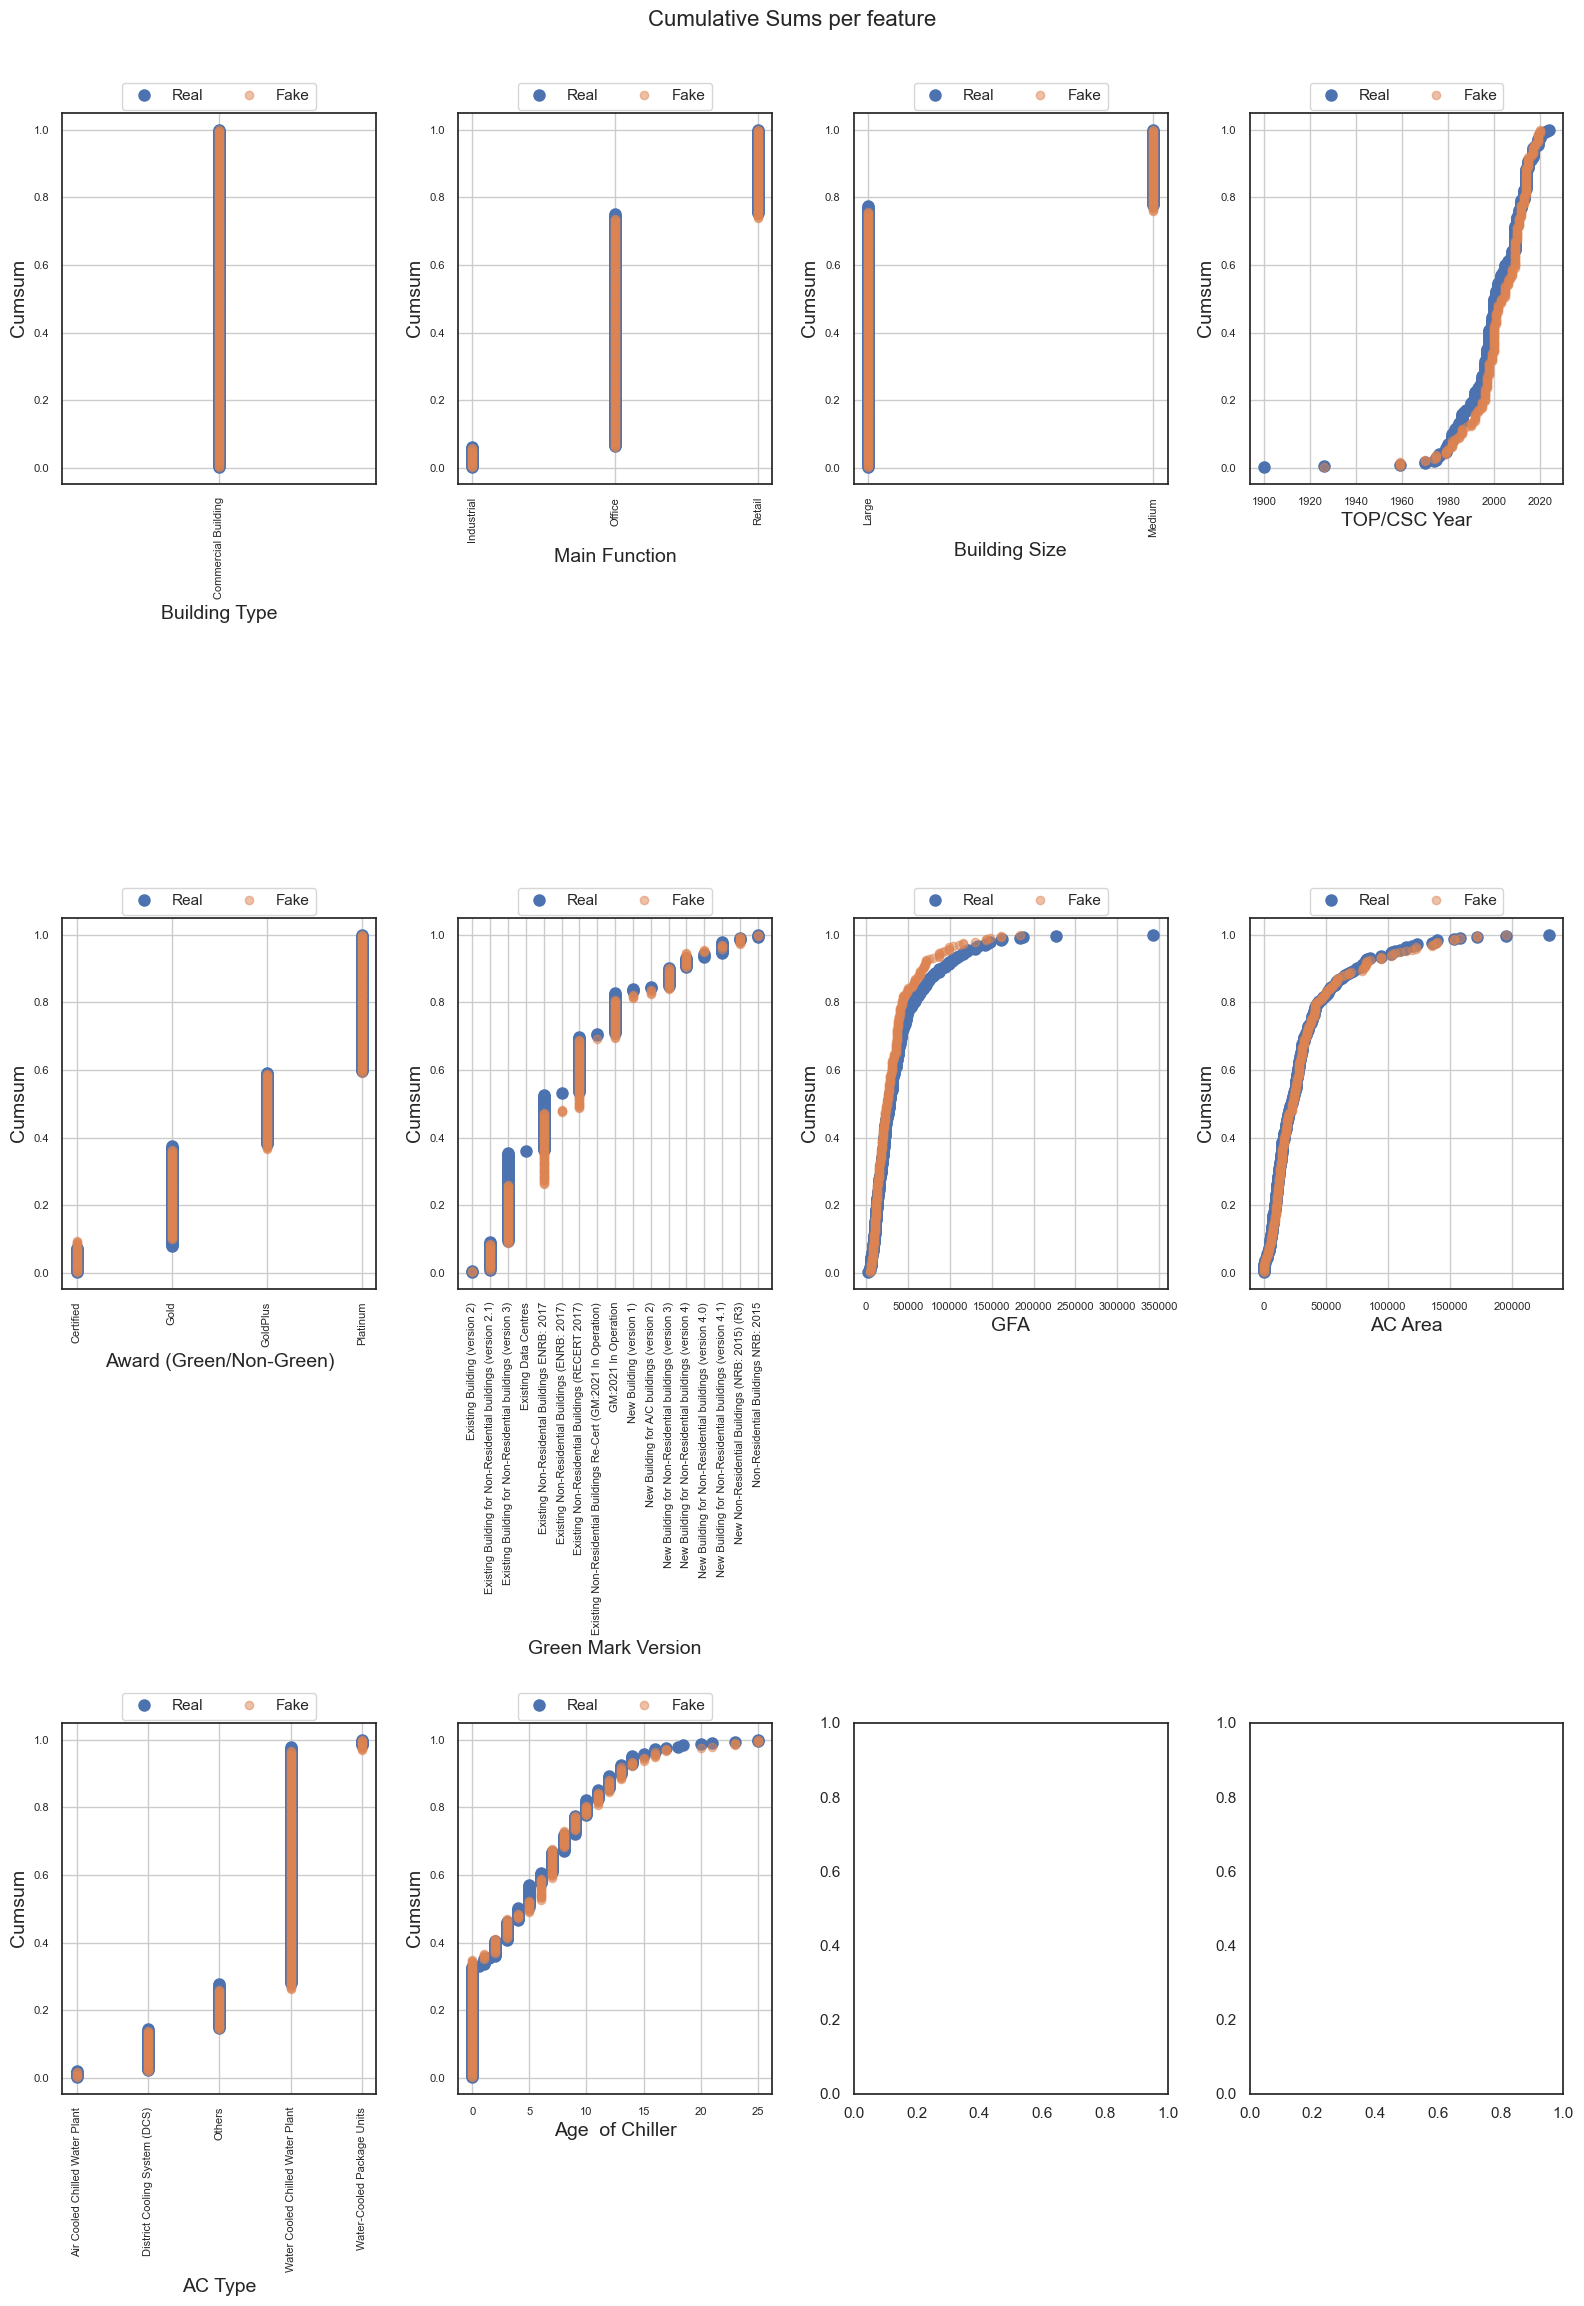

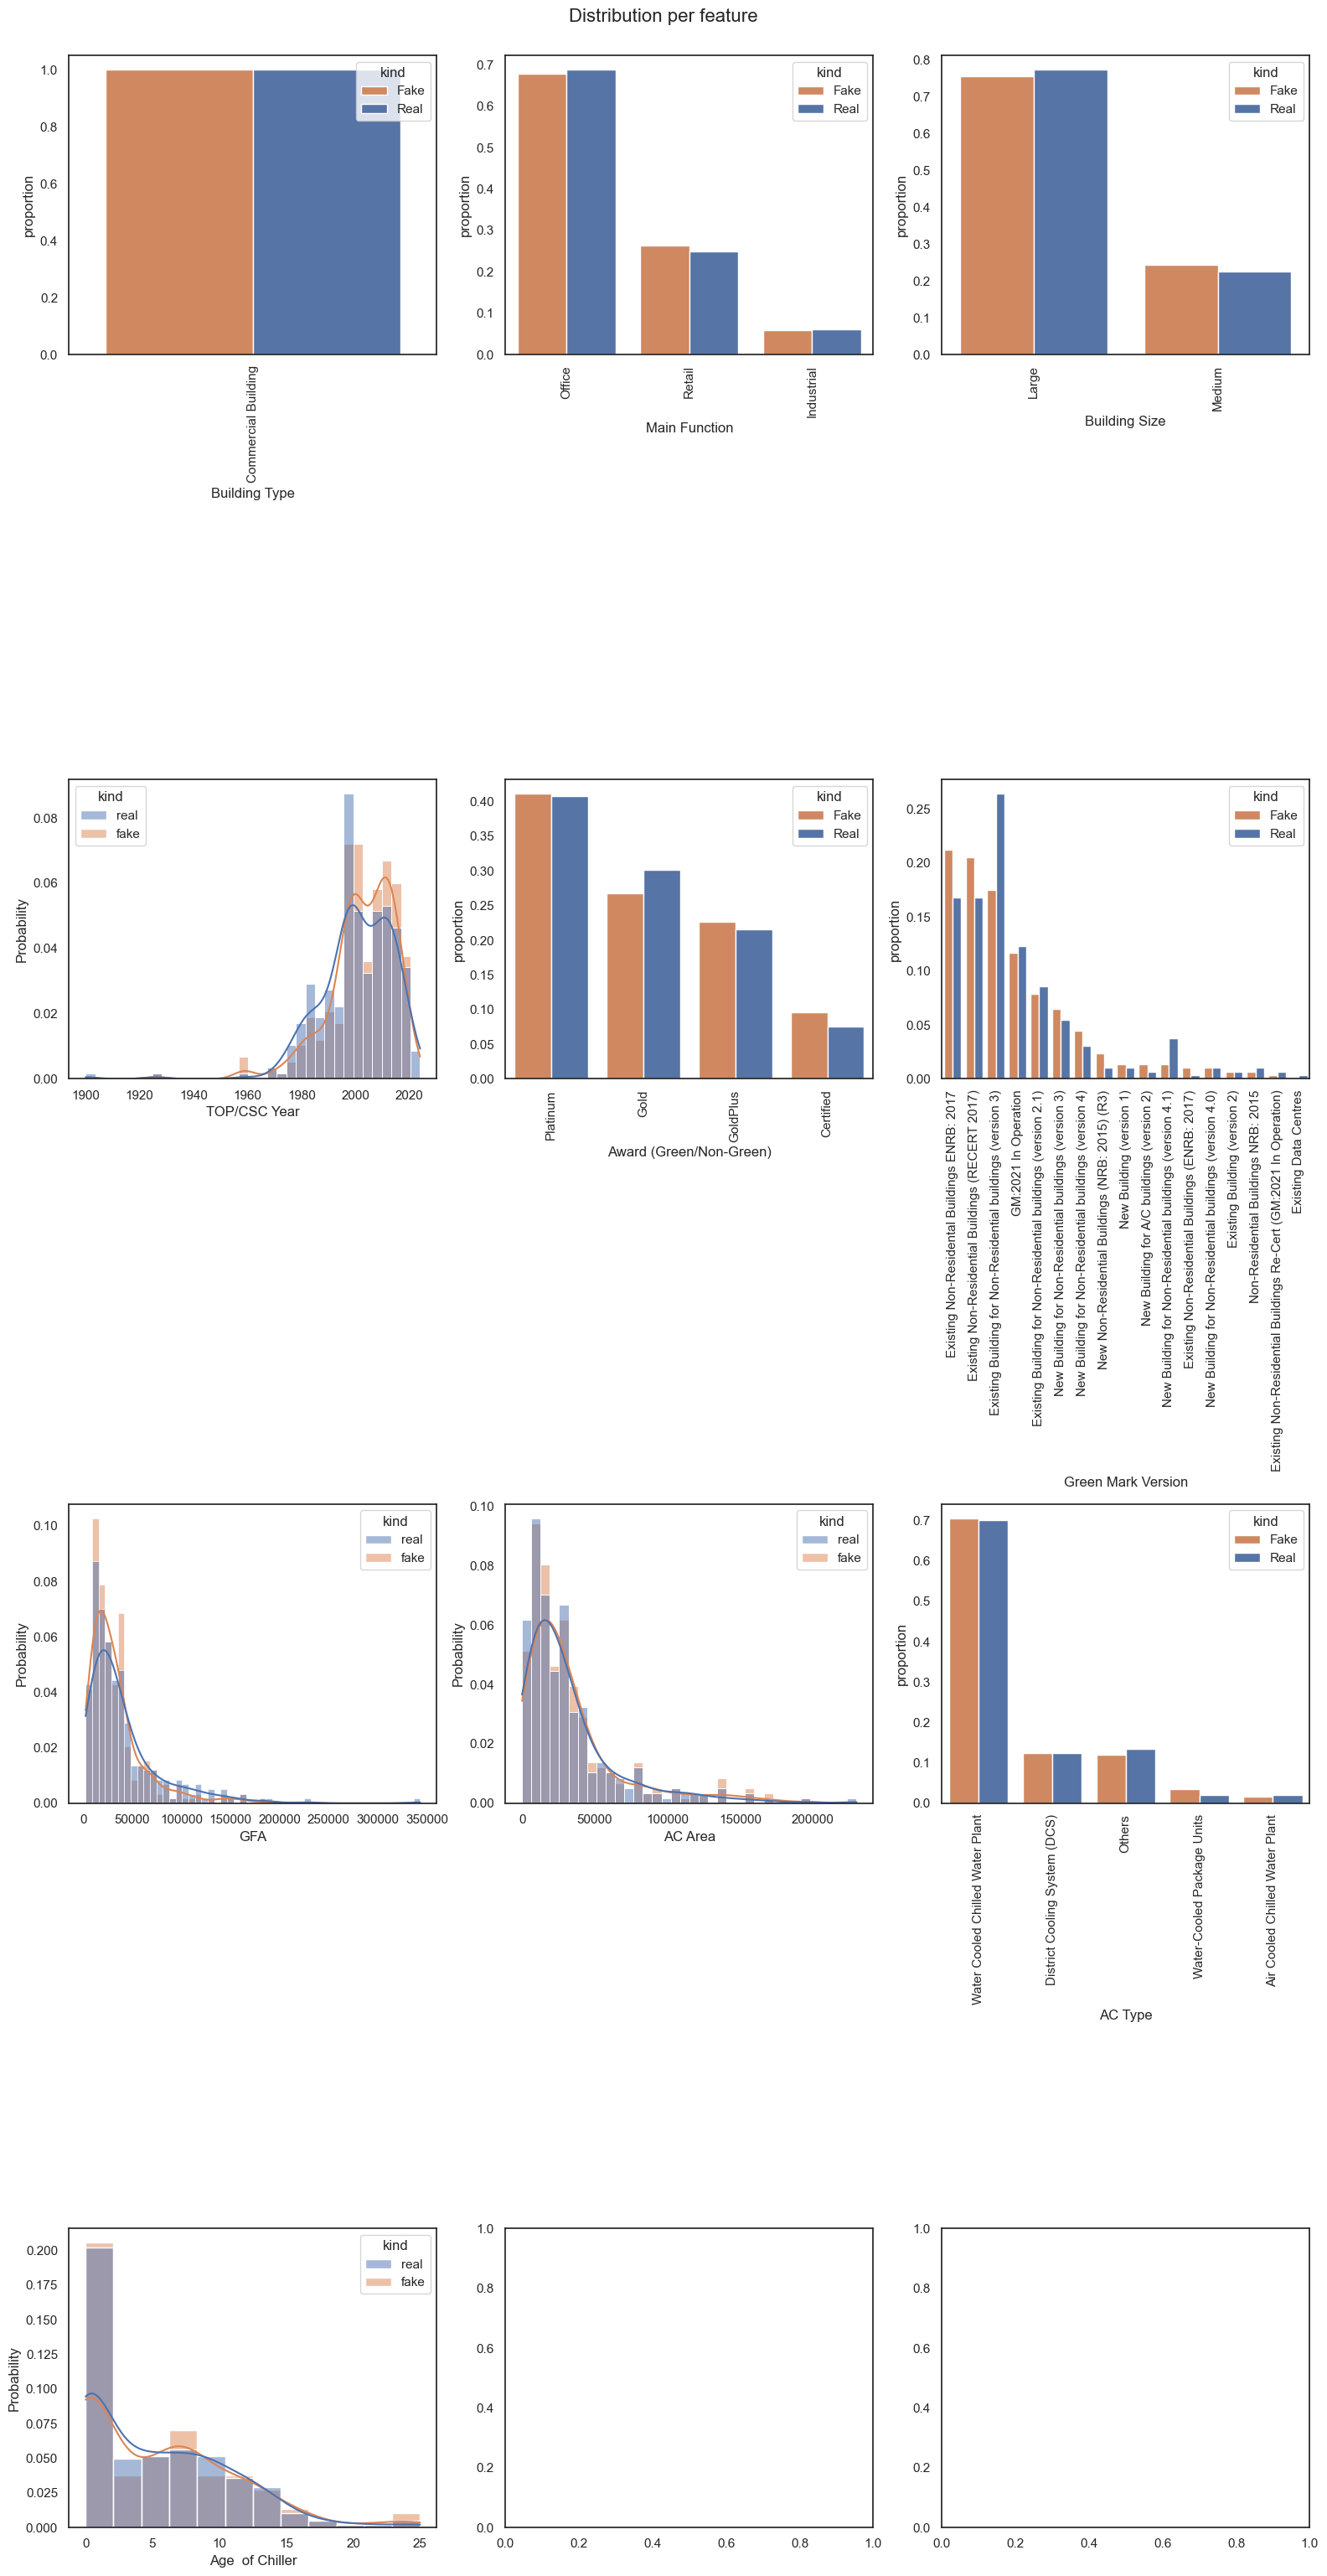

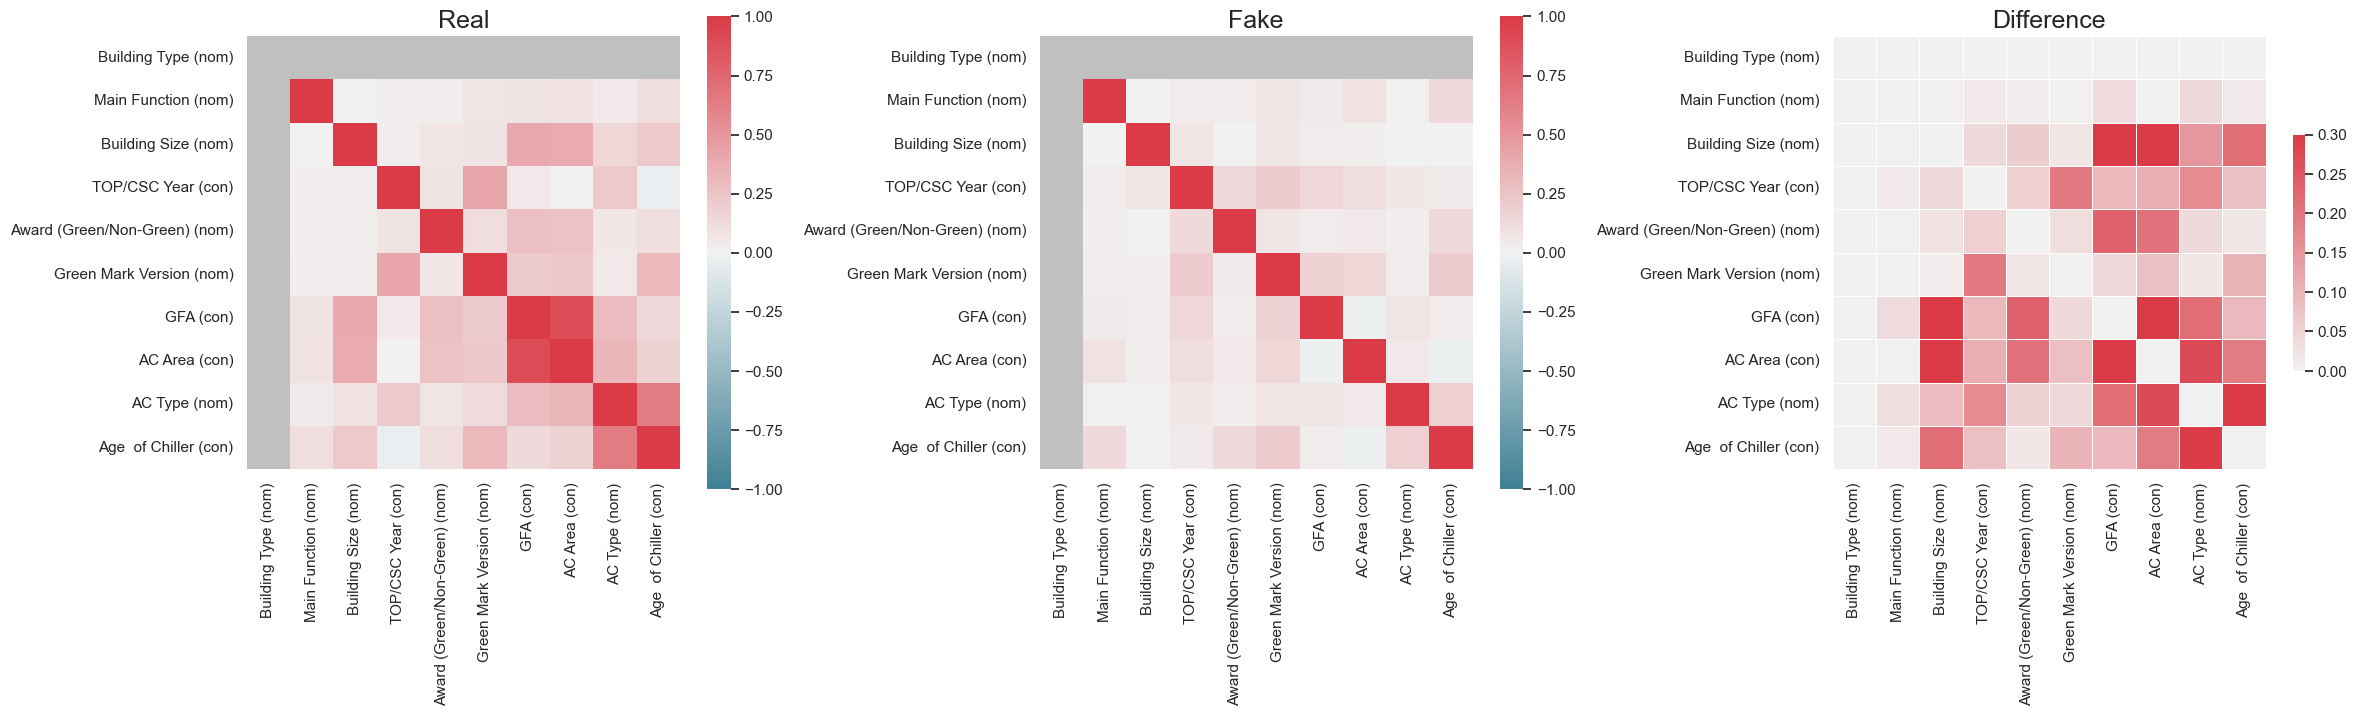

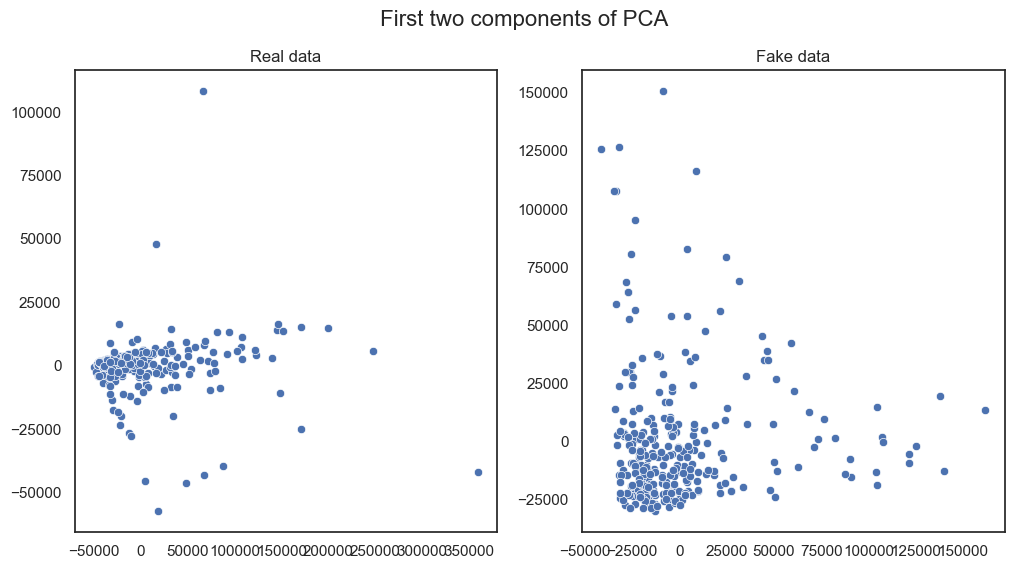

In [152]:
# from table_evaluator import TableEvaluator

# print(df.shape,sample.shape)
# table_evaluator = TableEvaluator(df,sample,cat_cols=categorical_columns)

# table_evaluator.visual_evaluation()

import pandas as pd
from table_evaluator import TableEvaluator

categorical_columns = ["Building Type", "Main Function", "Building Size", "Award (Green/Non-Green)", "Green Mark Version", "AC Type"]

print("Dataframe shape:", df.shape)
print("Sample shape:", sample.shape)

# Step 1: Check for empty dataframes
if df.empty or sample.empty:
    print("One of the dataframes is empty!")

# Step 2: Check column alignment
if not (df.columns == sample.columns).all():
    print("Columns do not match!")
    print("df columns:", df.columns)
    print("sample columns:", sample.columns)
else:
    print("Columns match.")

# Step 3: Check categorical columns
missing_columns = [col for col in categorical_columns if col not in df.columns]
if missing_columns:
    print("The following categorical columns are missing in the dataframe:", missing_columns)
else:
    print("All specified categorical columns are present in the dataframe.")

# Create the TableEvaluator instance
table_evaluator = TableEvaluator(df, sample, cat_cols=categorical_columns)

# Perform visual evaluation
try:
    table_evaluator.visual_evaluation()
except ValueError as e:
    print("Error during visual evaluation:", e)
